In [39]:
import numpy as np
import pandas as pd

pd.options.plotting.backend = 'plotly'

round = 4

prices = []
trades = []

last_timestamp = -100
for day in range(round - 3, round):
    p = pd.read_csv(f'../../data/round{round}/prices_round_{round}_day_{day}.csv', sep=';')
    p['timestamp'] = p['timestamp'] + last_timestamp + 100
    prices.append(p)

    t = pd.read_csv(f'../../data/round{round}/trades_round_{round}_day_{day}_wn.csv', sep=';')
    t['timestamp'] = t['timestamp'] + last_timestamp + 100
    trades.append(t)

    last_timestamp = np.max(p['timestamp'])

prices = pd.concat(prices, axis=0, ignore_index=True)
trades = pd.concat(trades, axis=0, ignore_index=True)

prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3,2999700,COCONUT_COUPON,575.0,40.0,NaN,NaN,NaN,NaN,576,40,NaN,NaN,NaN,NaN,575.5,0.0
59996,3,2999800,COCONUT_COUPON,575.0,30.0,NaN,NaN,NaN,NaN,576,44,NaN,NaN,NaN,NaN,575.5,0.0
59997,3,2999800,COCONUT,9883.0,127.0,9882.0,46.0,NaN,NaN,9885,164,NaN,NaN,NaN,NaN,9884.0,0.0
59998,3,2999900,COCONUT_COUPON,575.0,43.0,NaN,NaN,NaN,NaN,576,43,NaN,NaN,NaN,NaN,575.5,0.0


In [40]:
trades

,timestamp,buyer,seller,symbol,currency,price,quantity
0,800,Valentina,Valentina,COCONUT_COUPON,SEASHELLS,636.0,5
1,900,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,634.0,17
2,1100,Valentina,Ruby,COCONUT_COUPON,SEASHELLS,635.0,17
3,1900,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,635.0,16
4,2000,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,637.0,14
...,...,...,...,...,...,...,...
5124,2996200,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,585.0,14
5125,2997100,Vinnie,Vinnie,COCONUT,SEASHELLS,9885.0,9
5126,2997200,Vinnie,Vinnie,COCONUT,SEASHELLS,9883.0,8
5127,2998600,Vinnie,Raj,COCONUT,SEASHELLS,9887.0,5


In [41]:
bots = set(trades['buyer'].unique()) | set(trades['seller'].unique())
products = set(prices['product'].unique())
bots

{'Raj', 'Rhianna', 'Ruby', 'Valentina', 'Vinnie', 'Vladimir'}

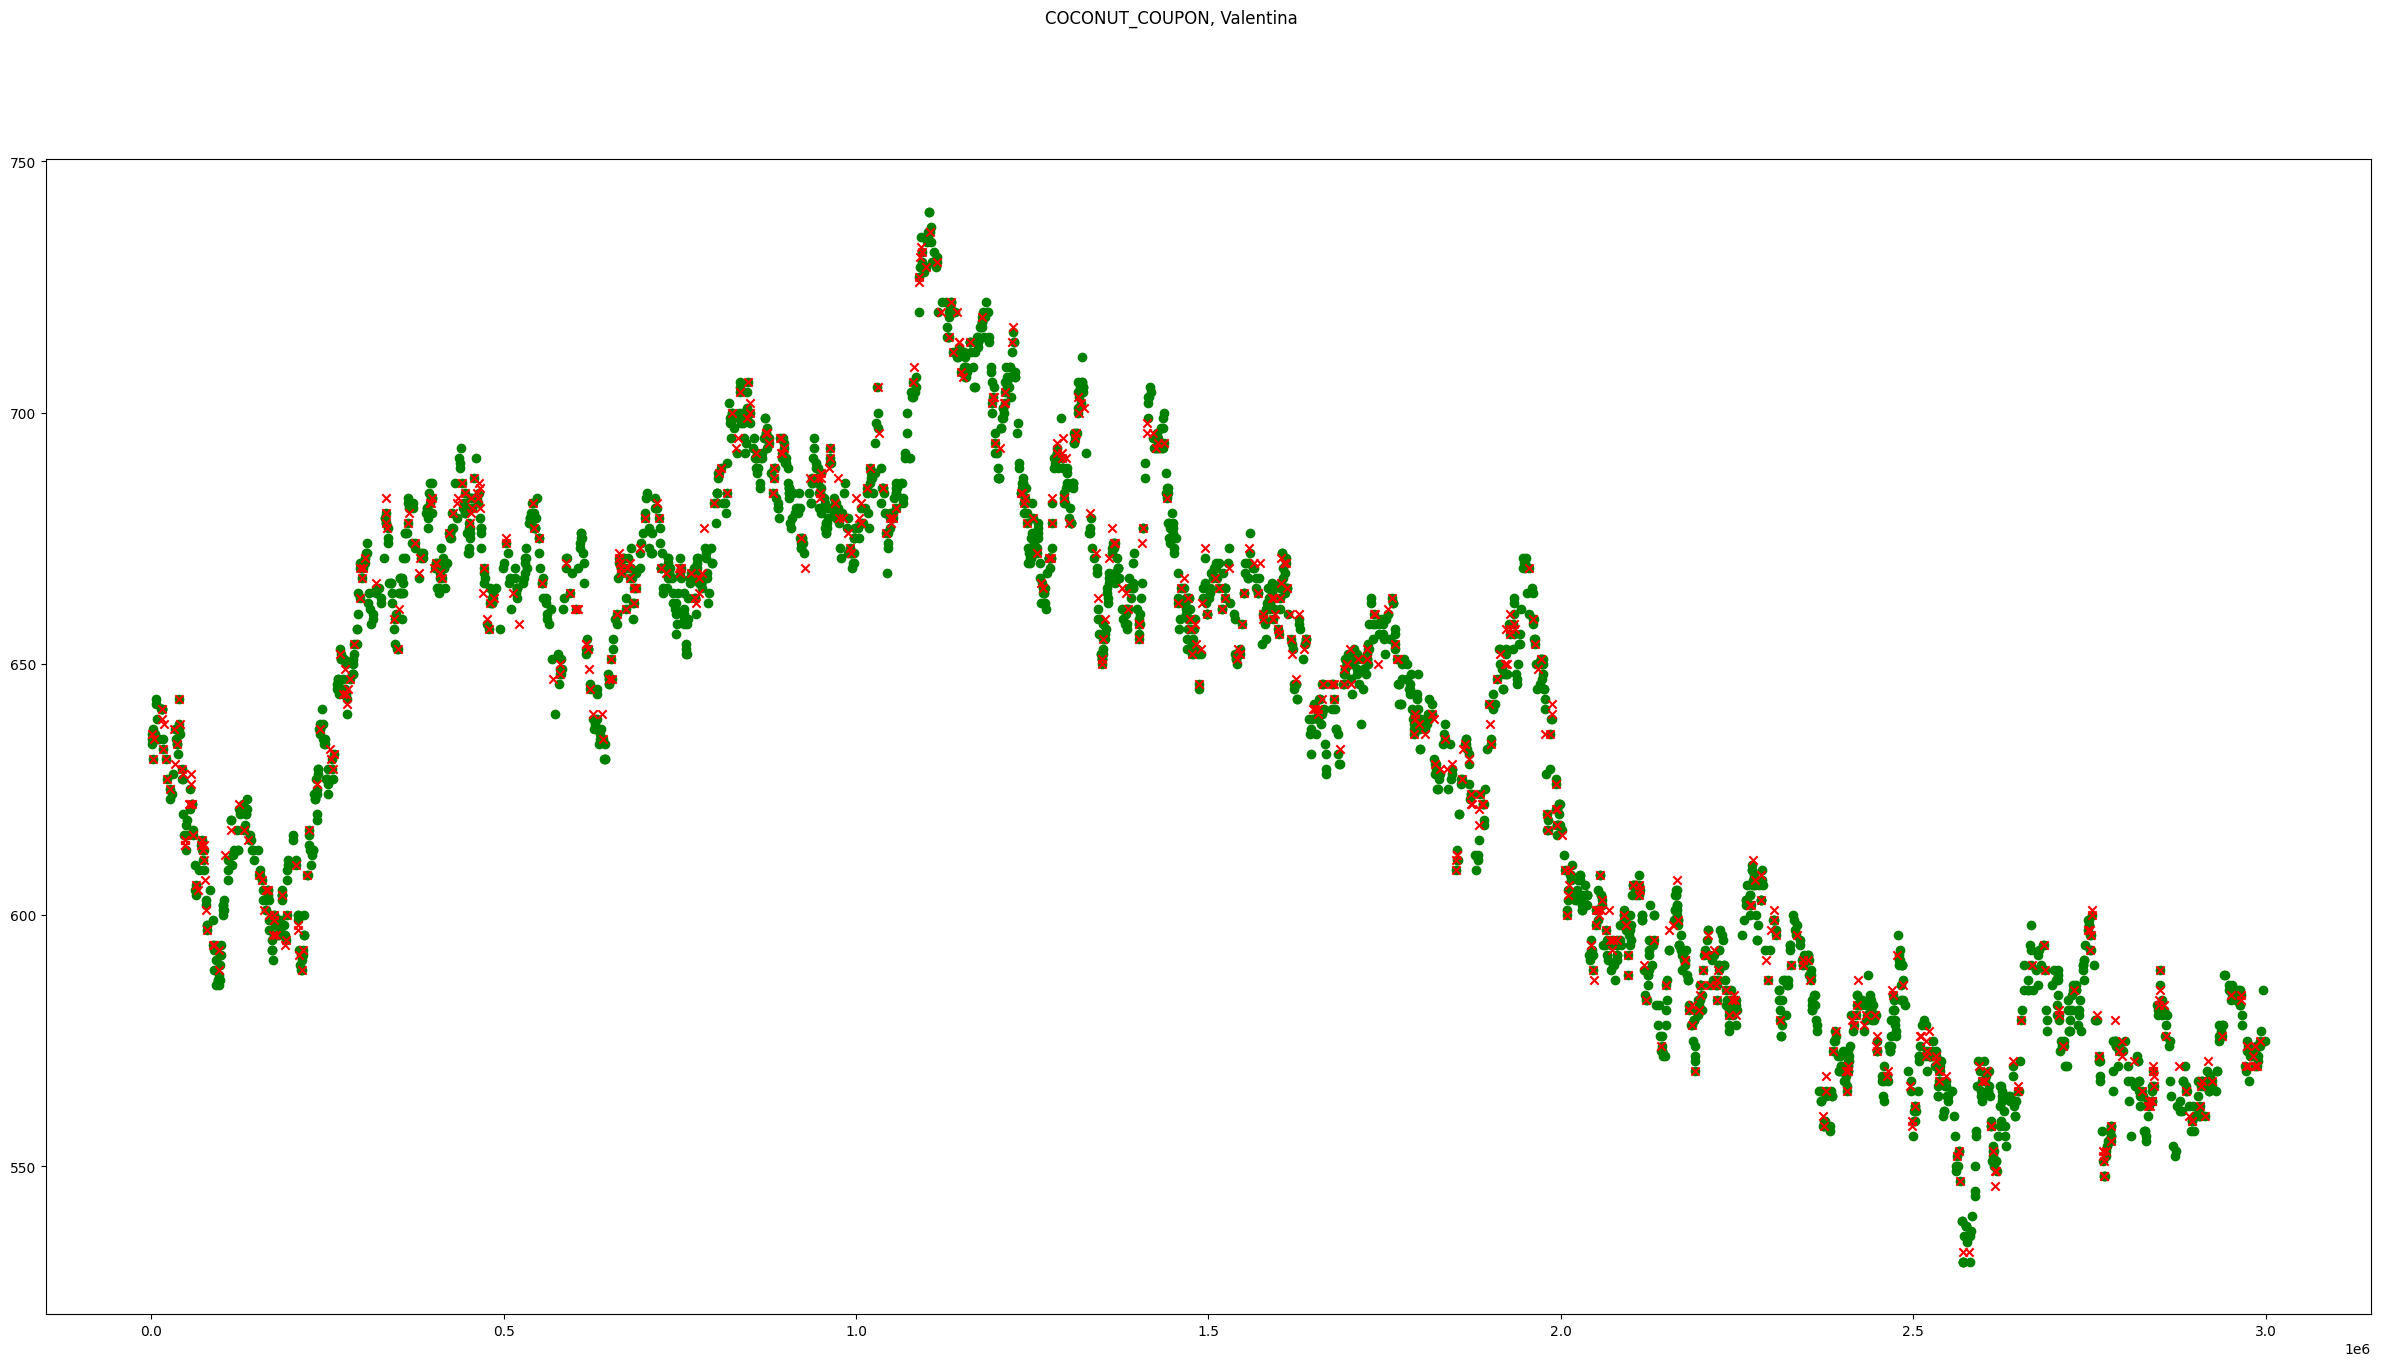

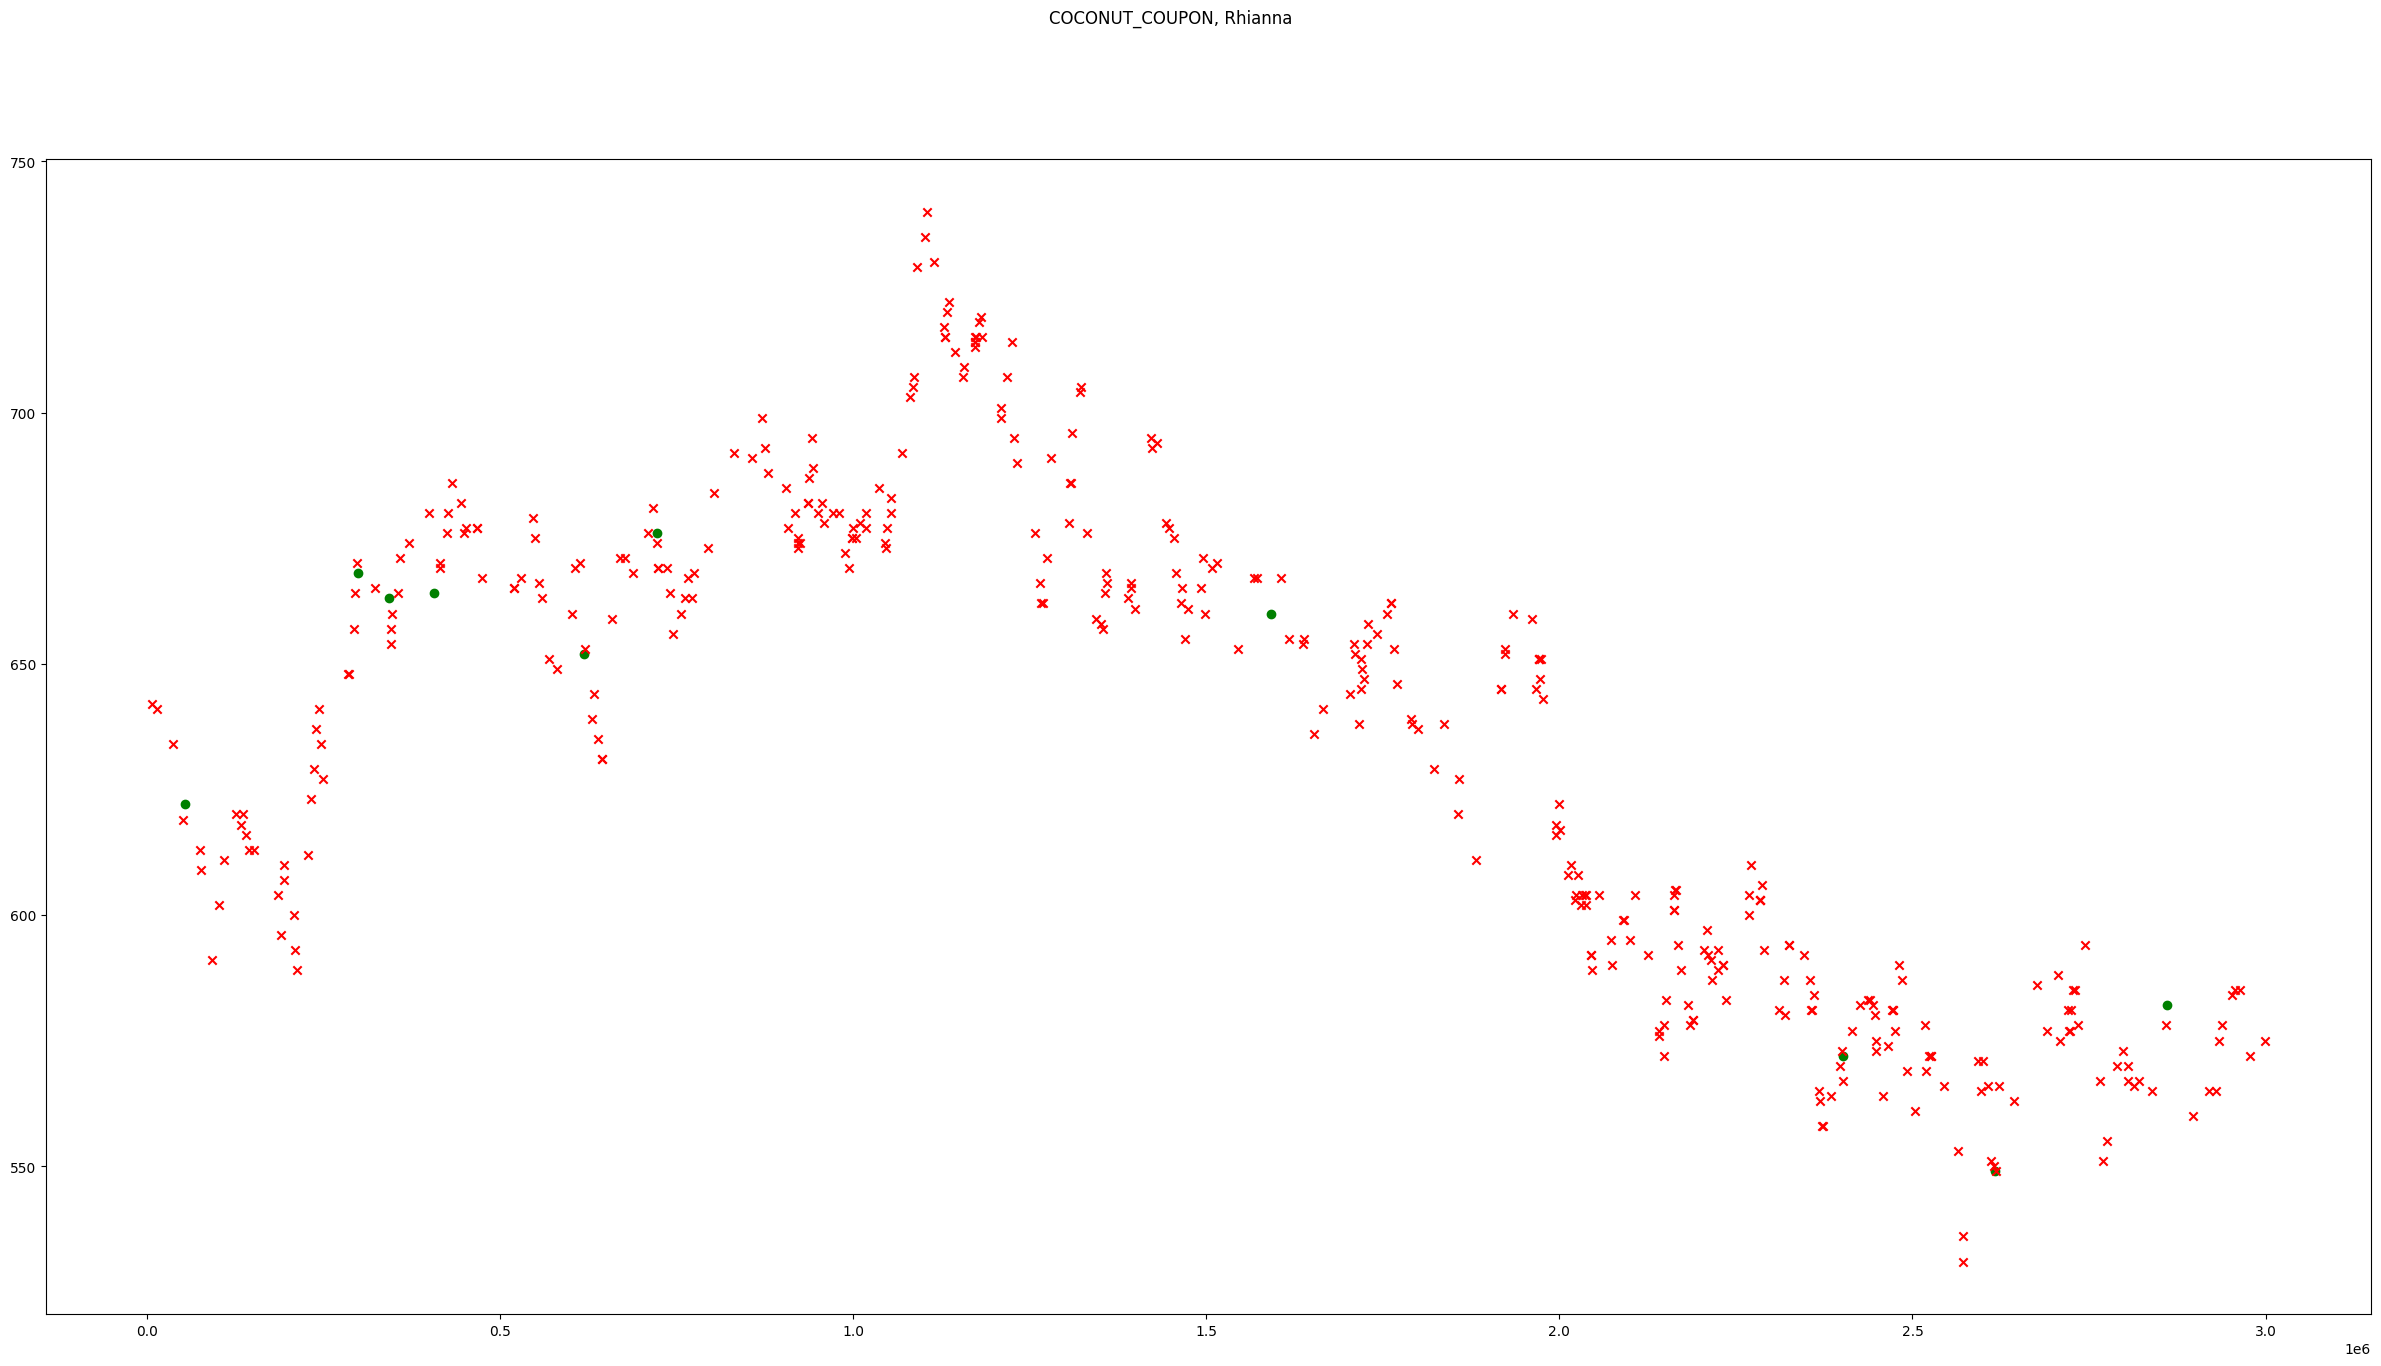

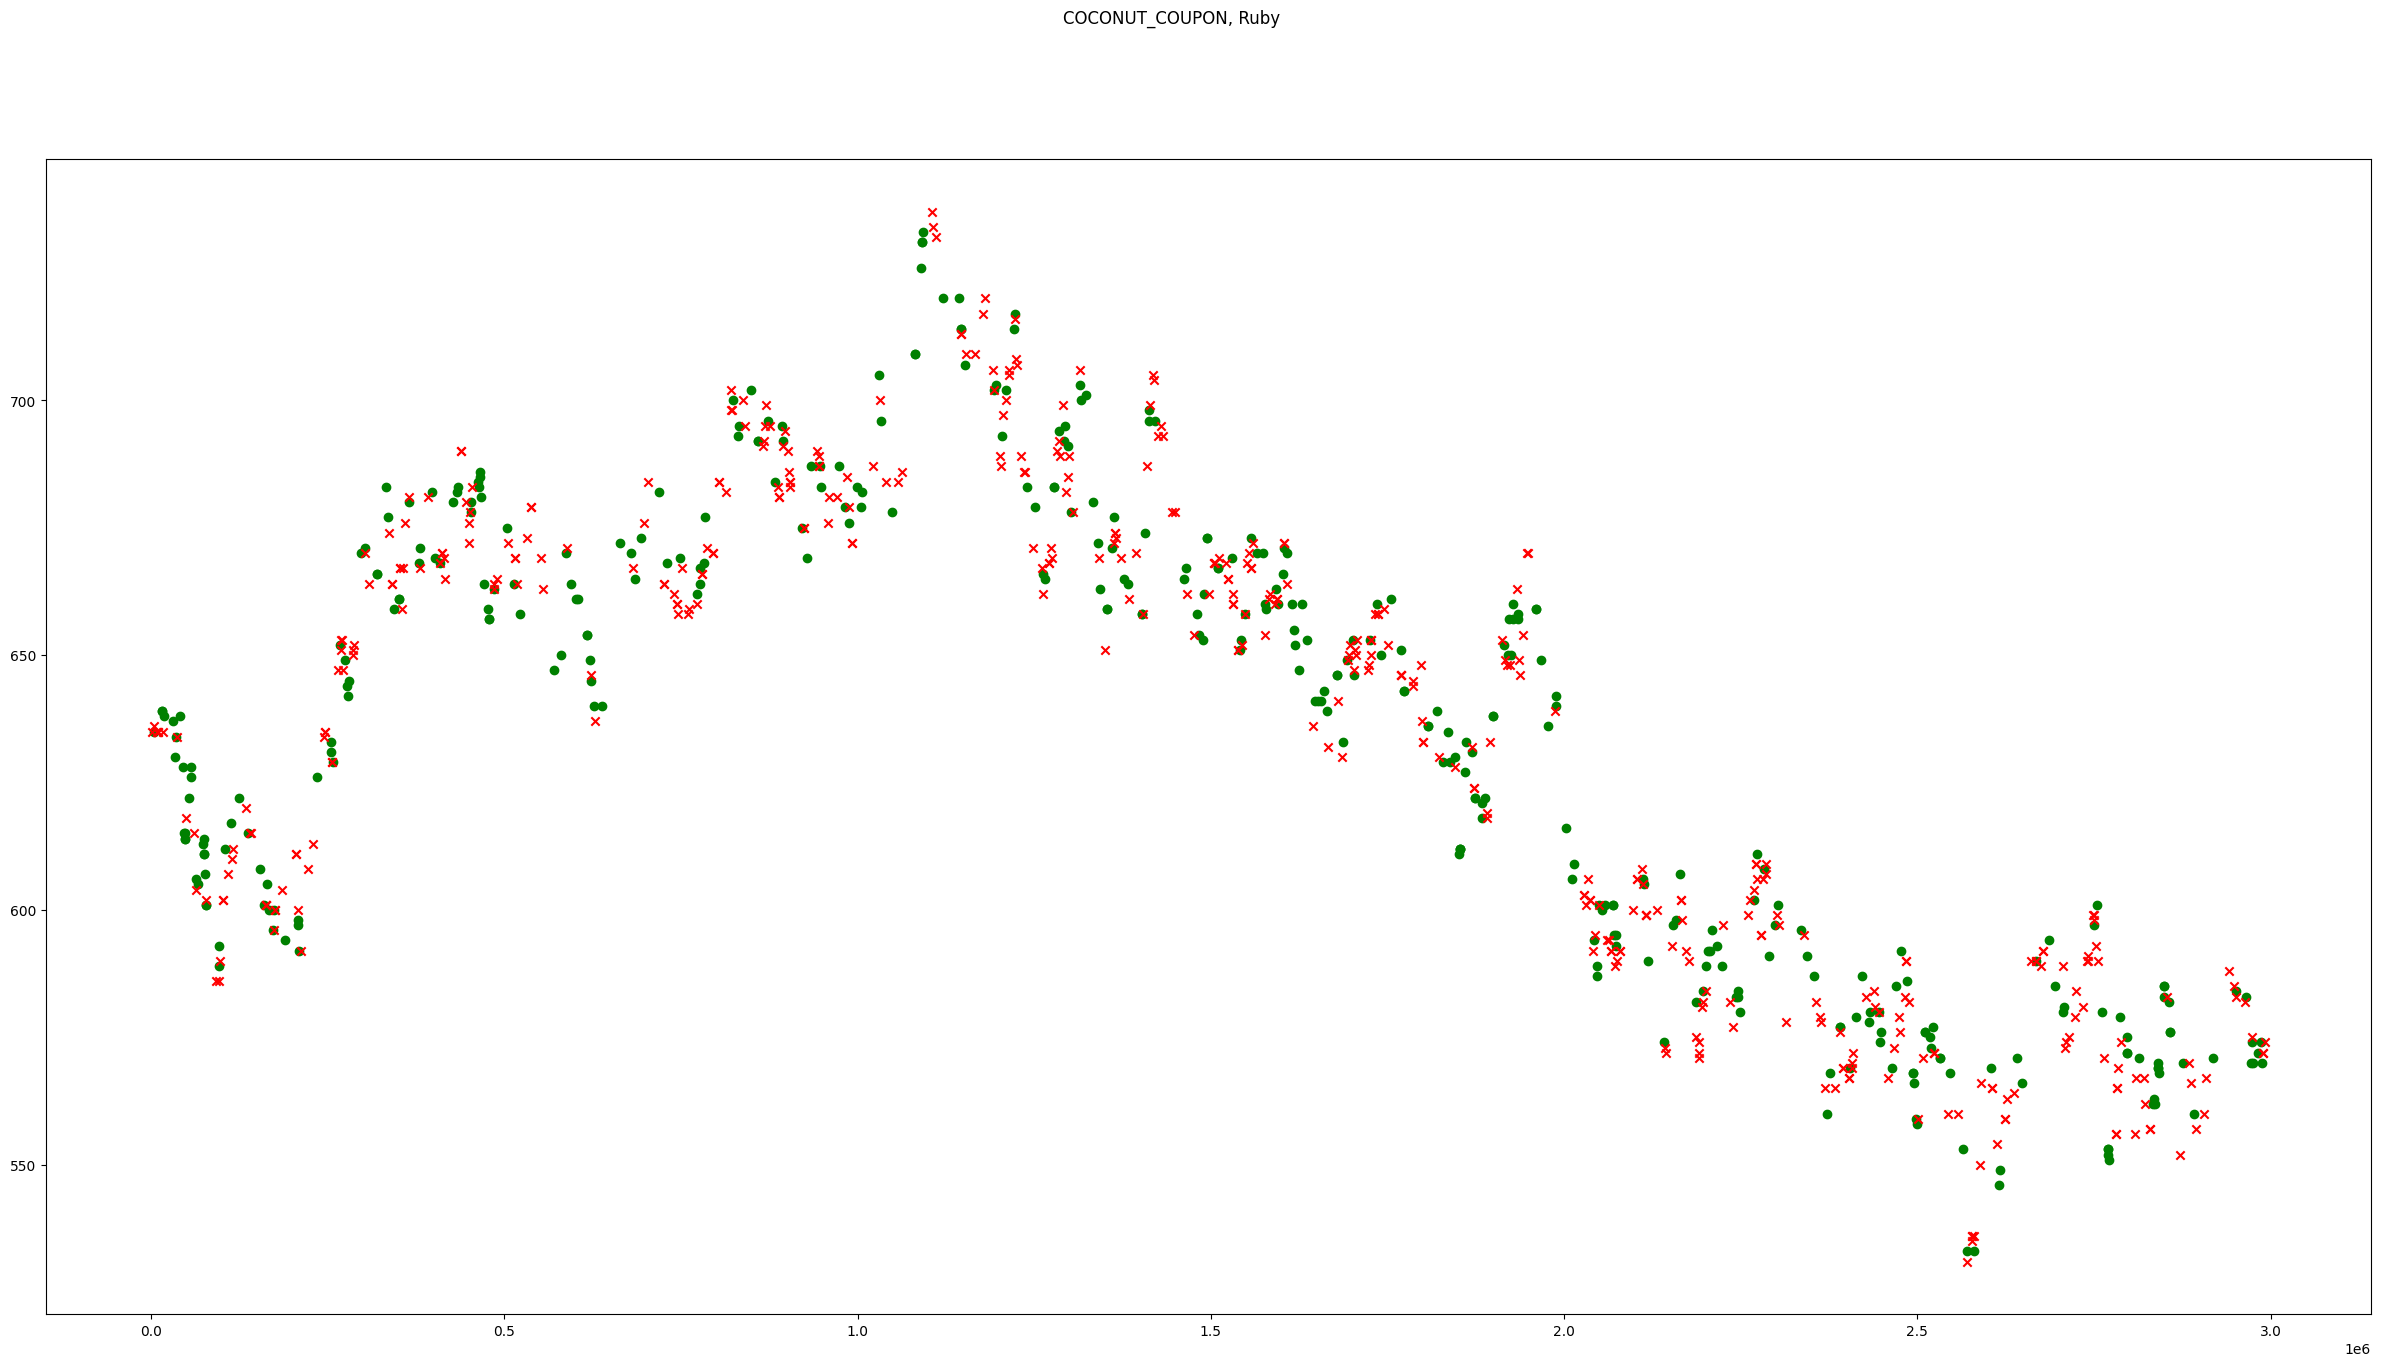

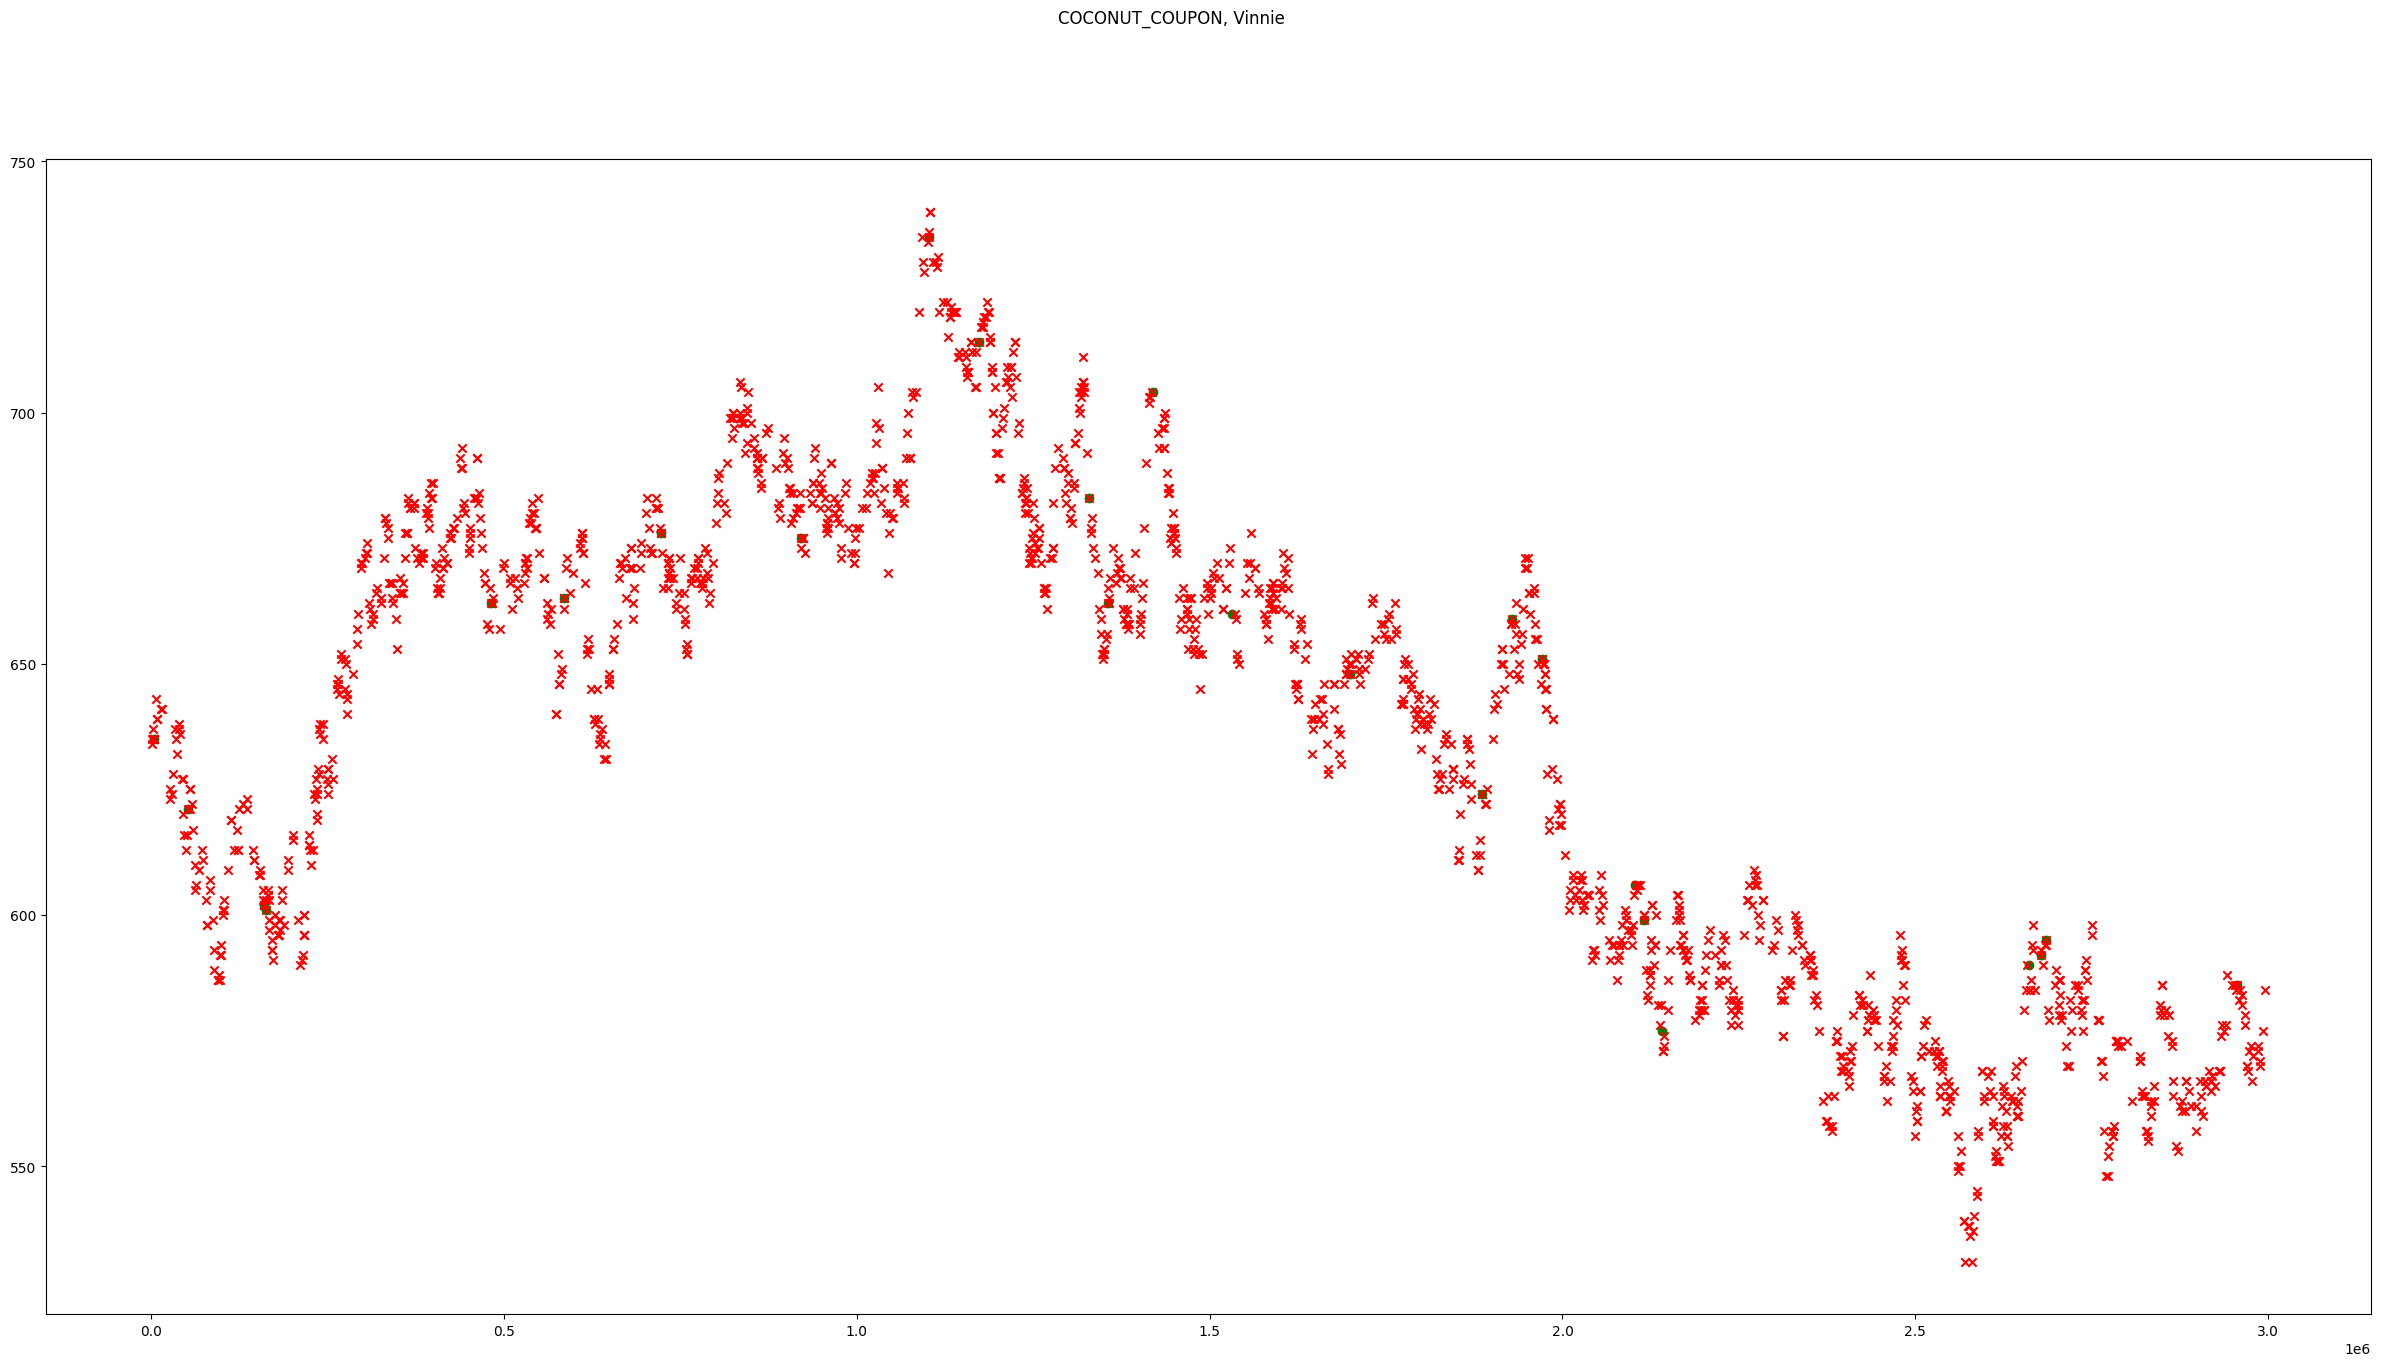

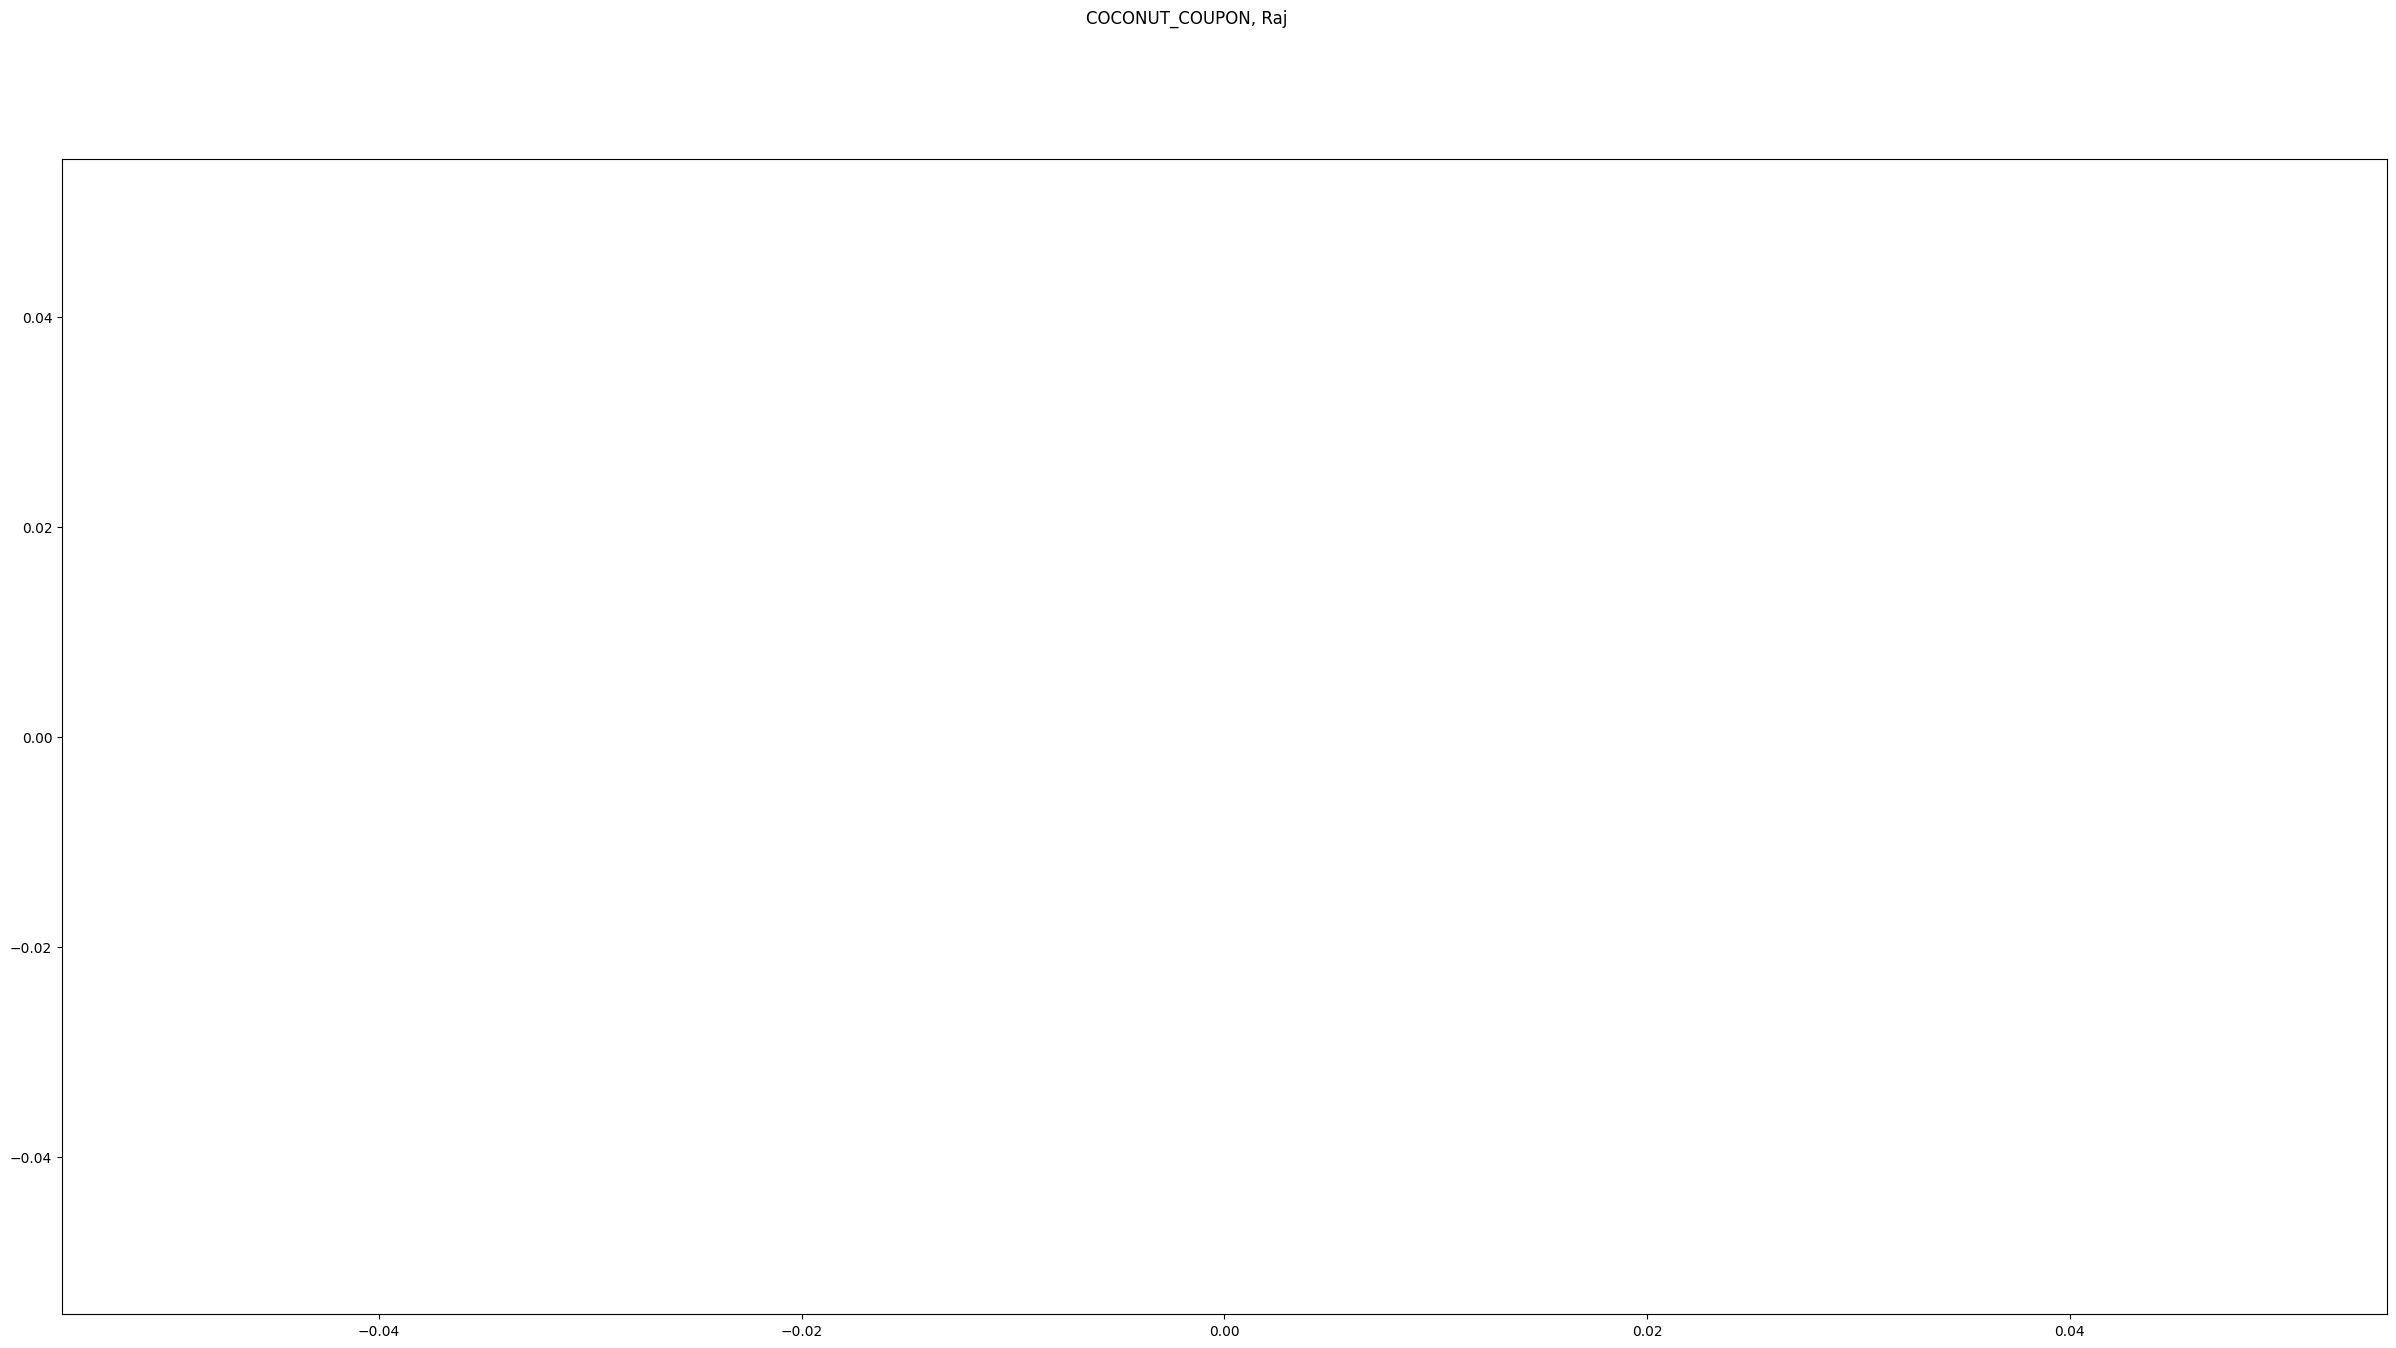

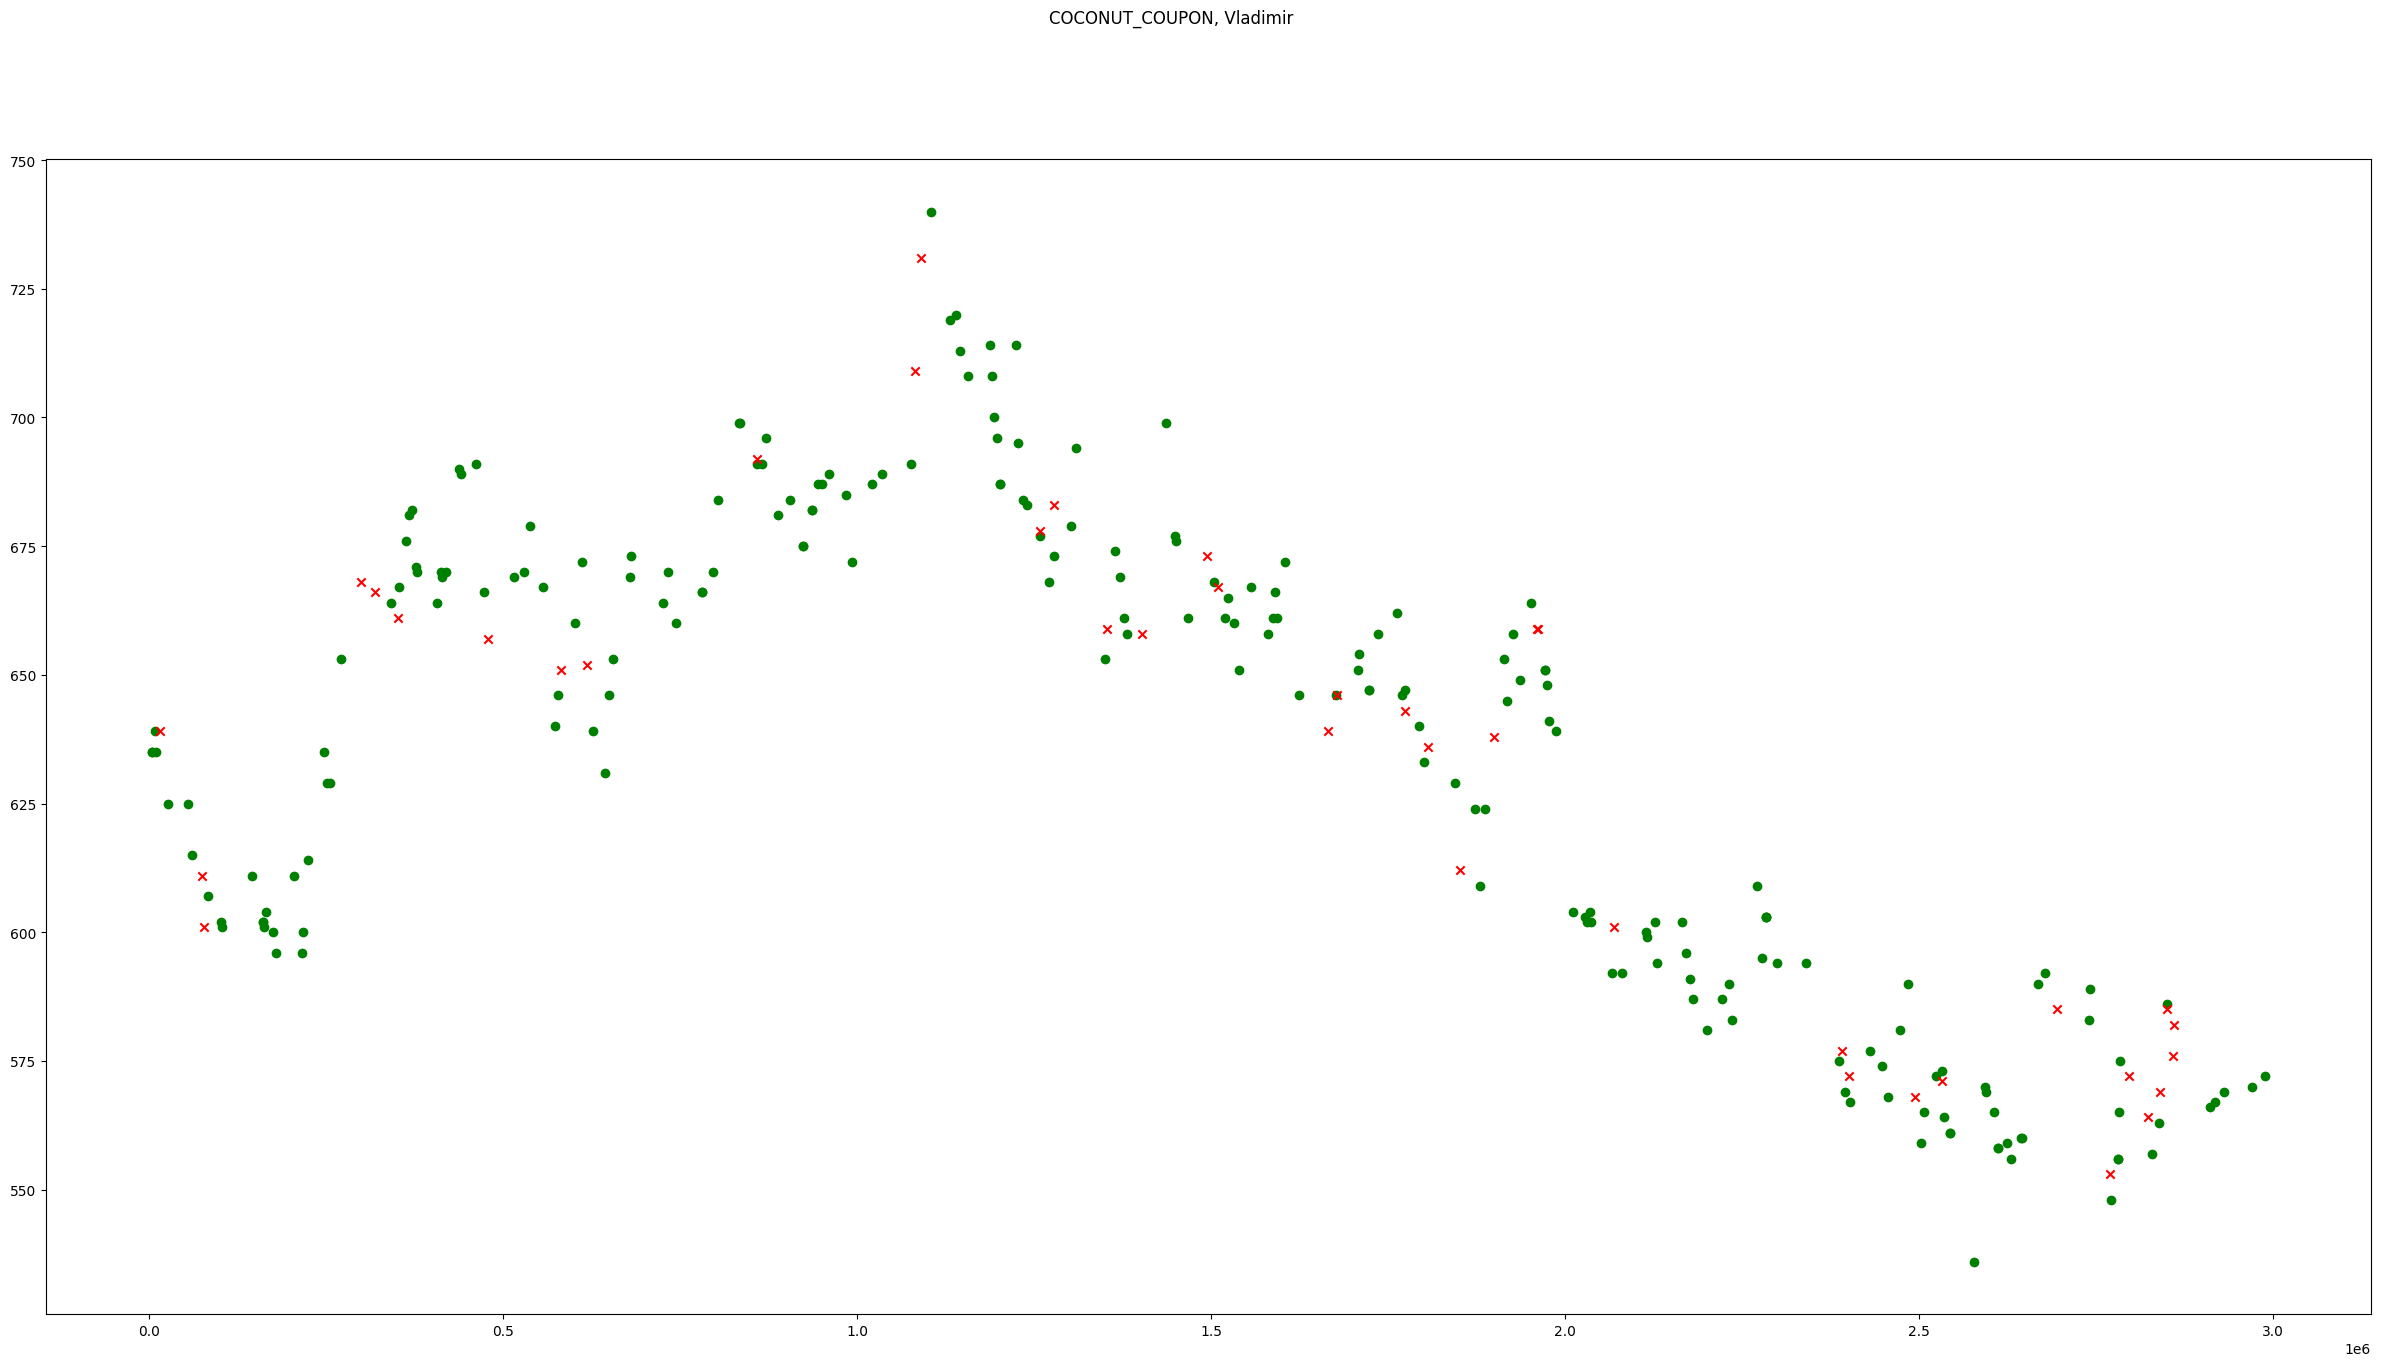

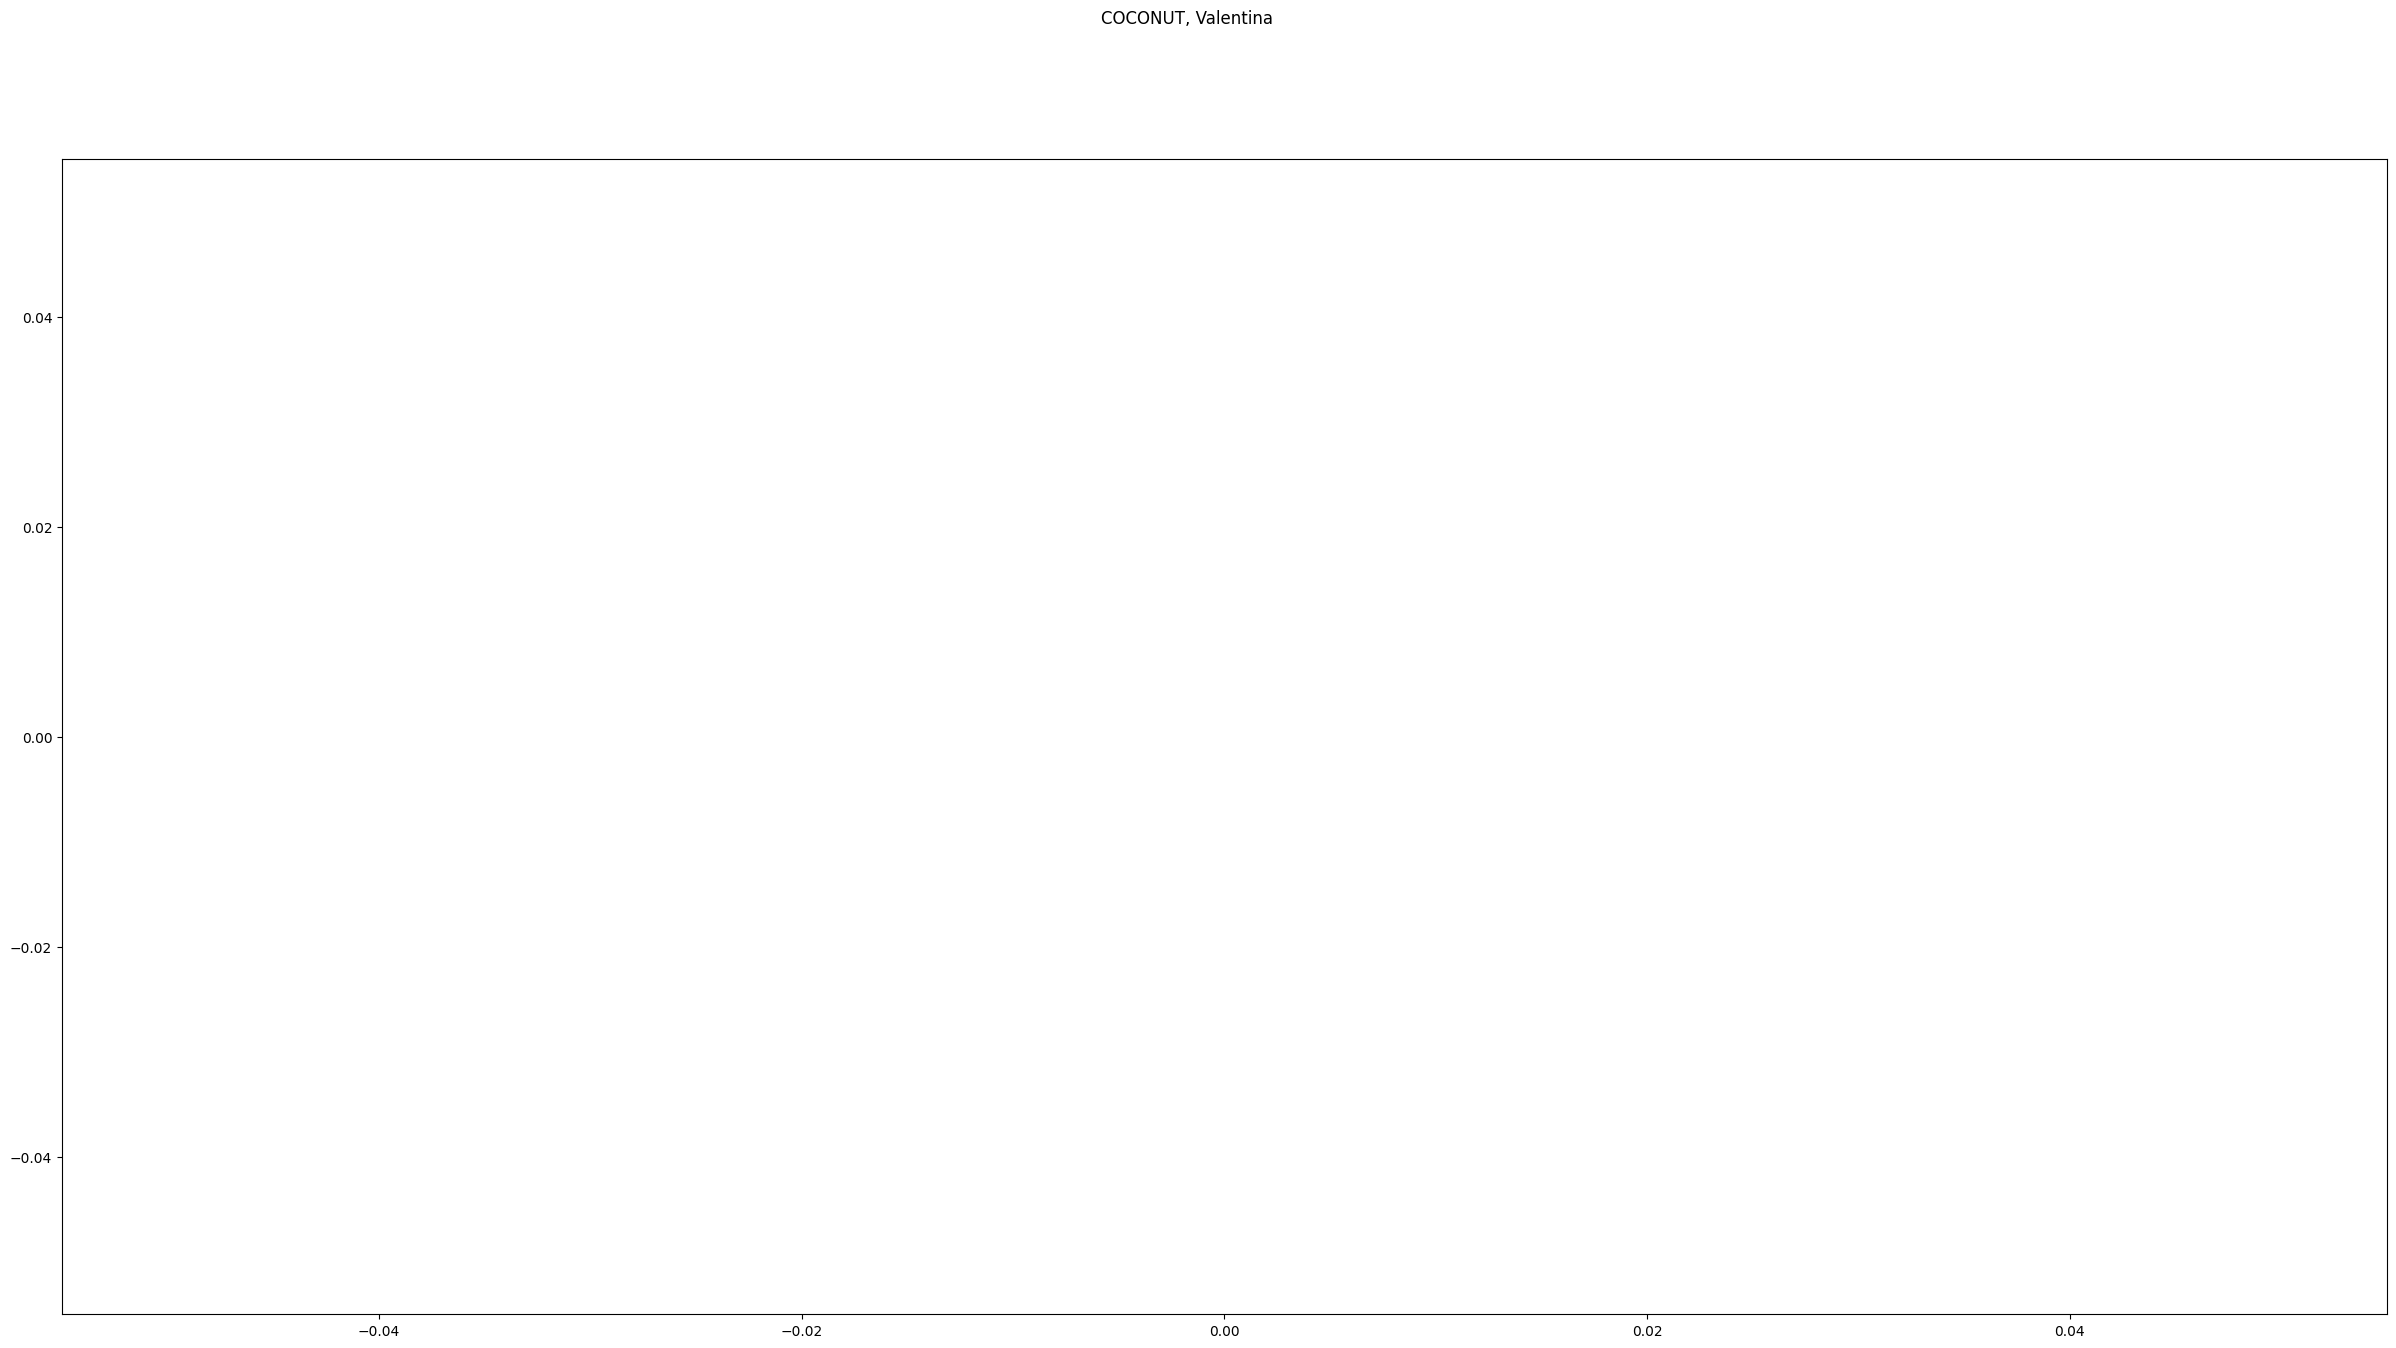

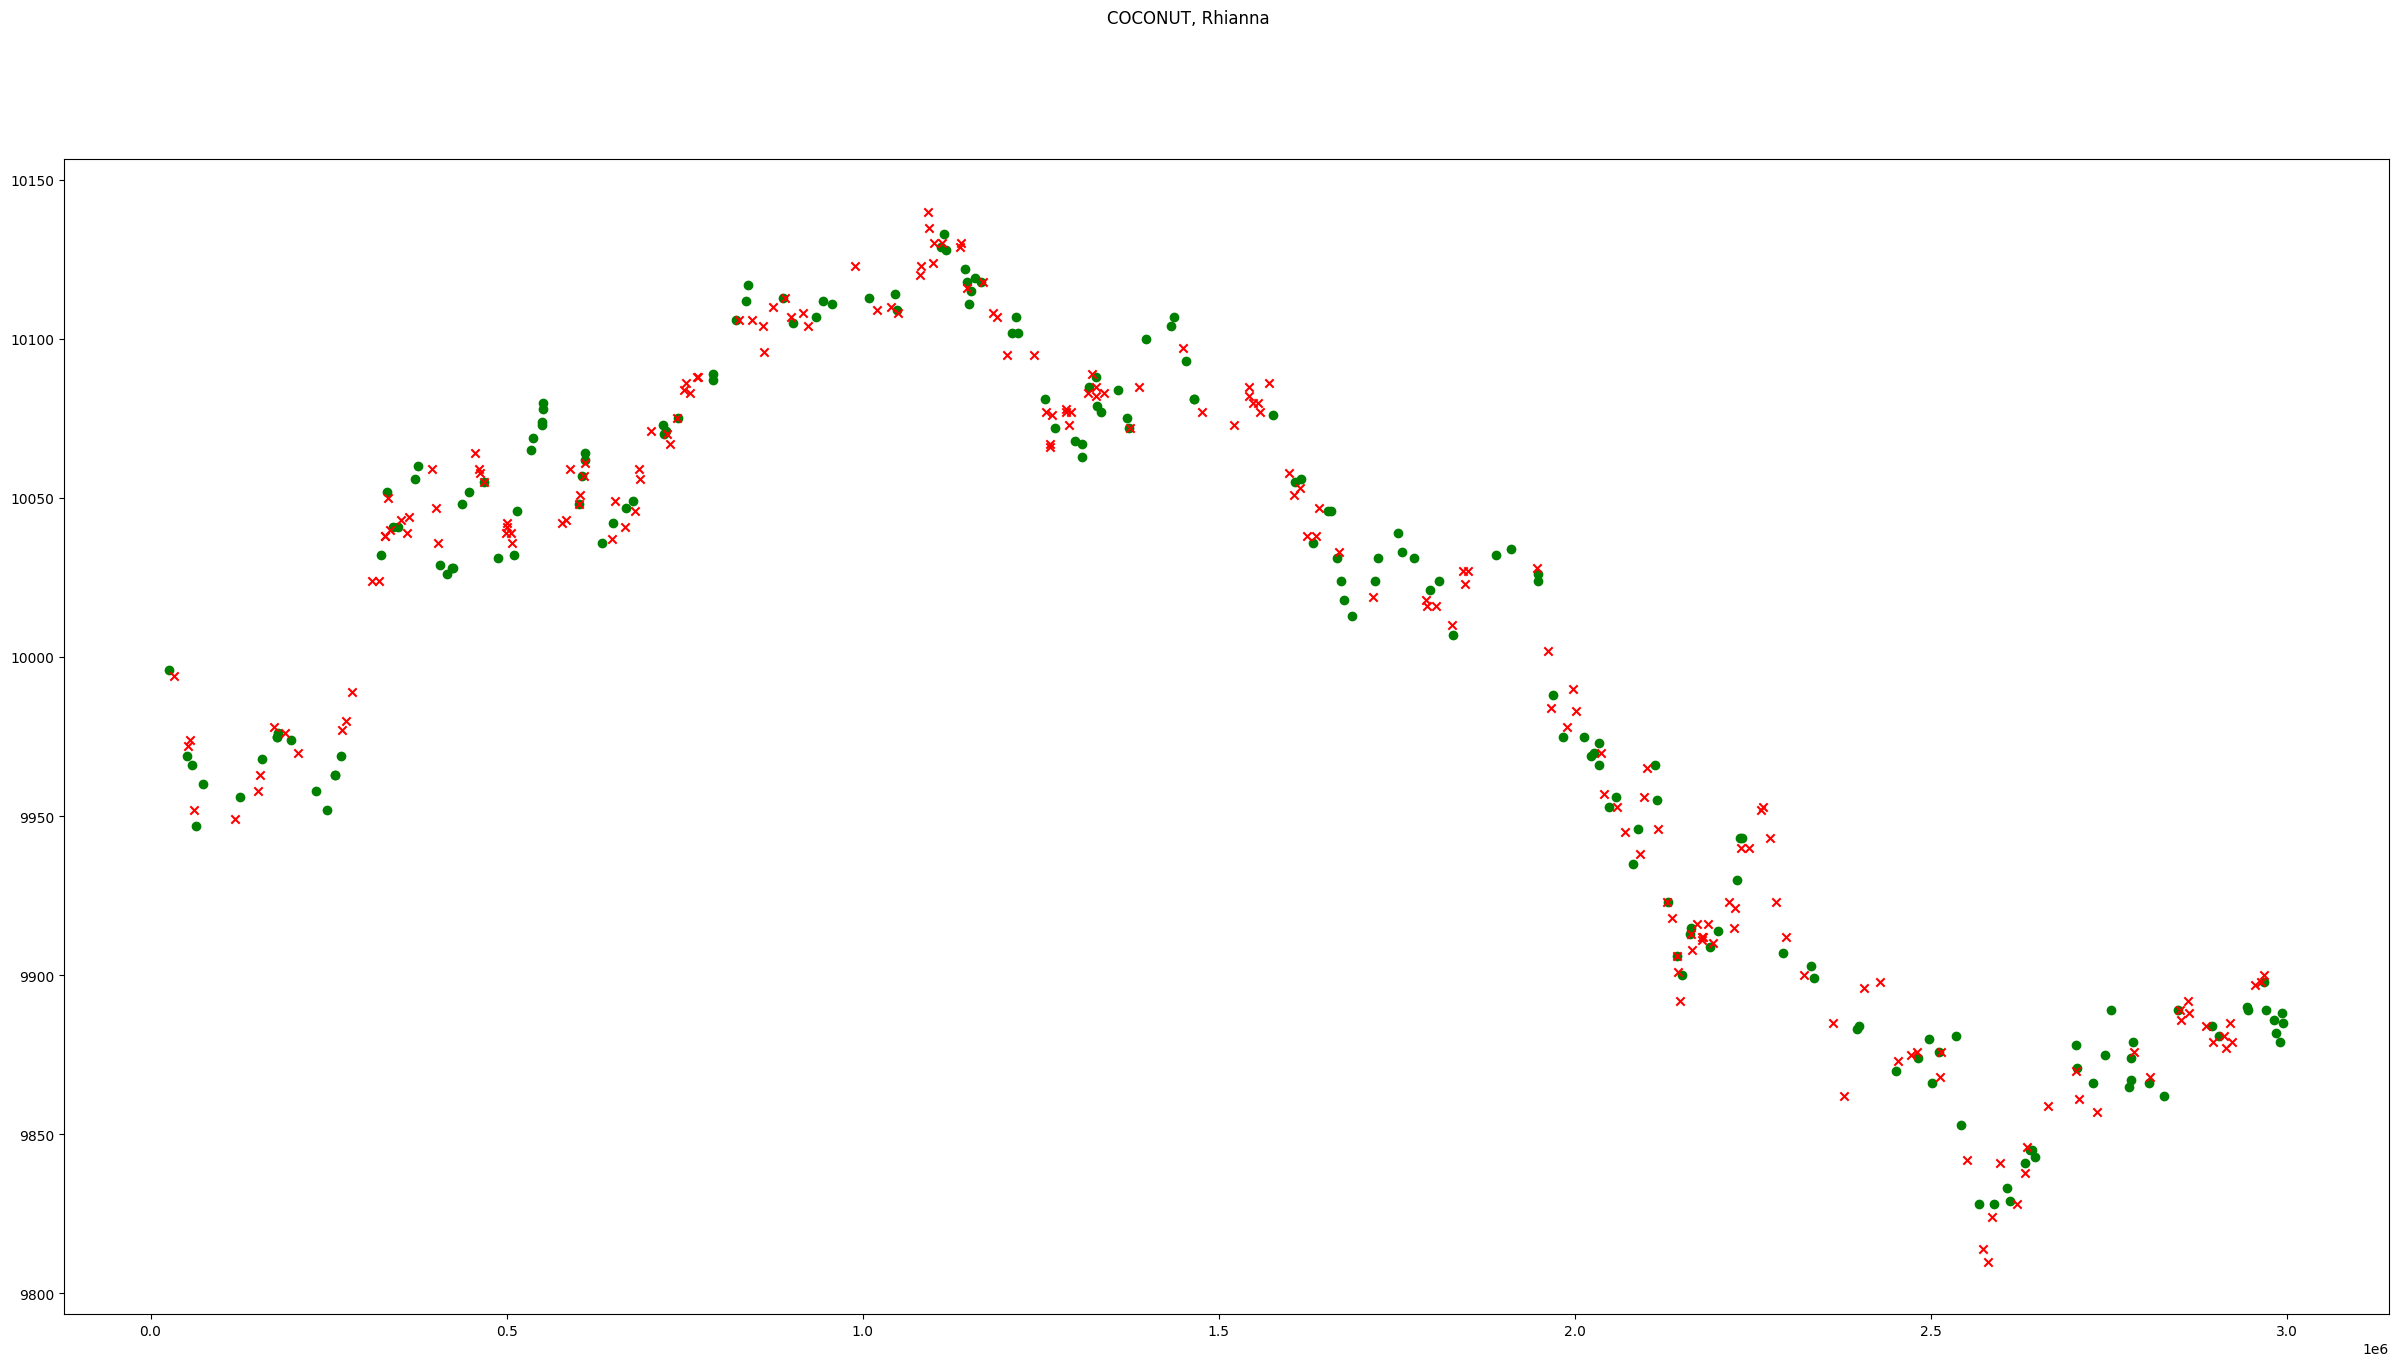

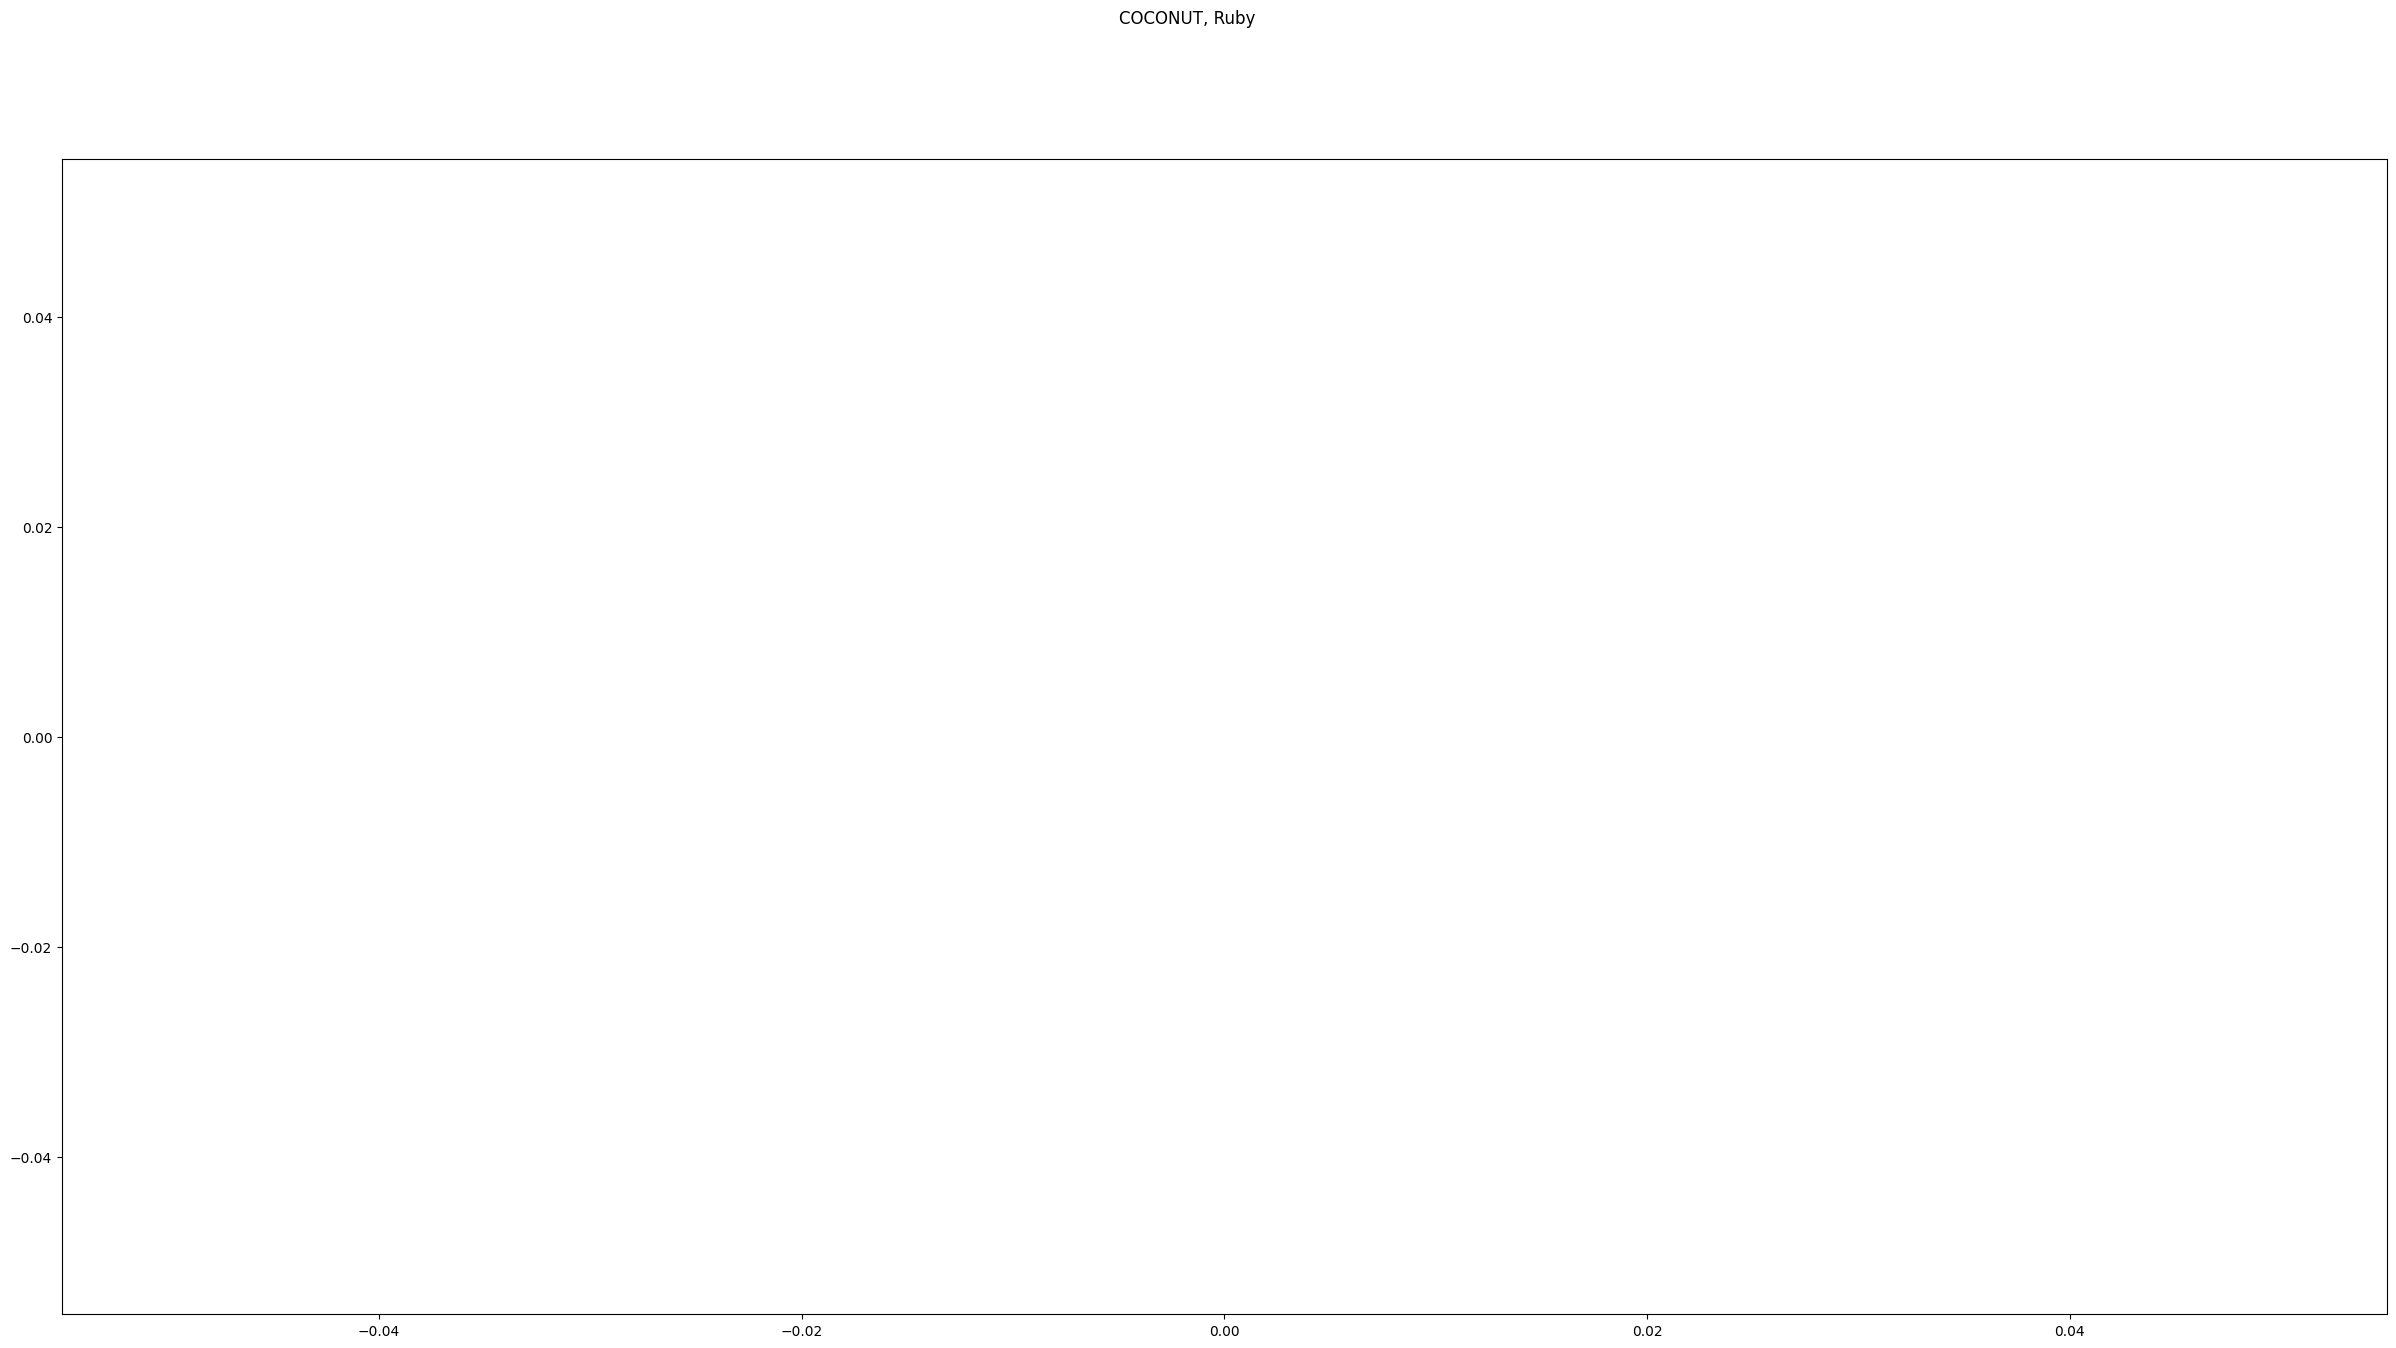

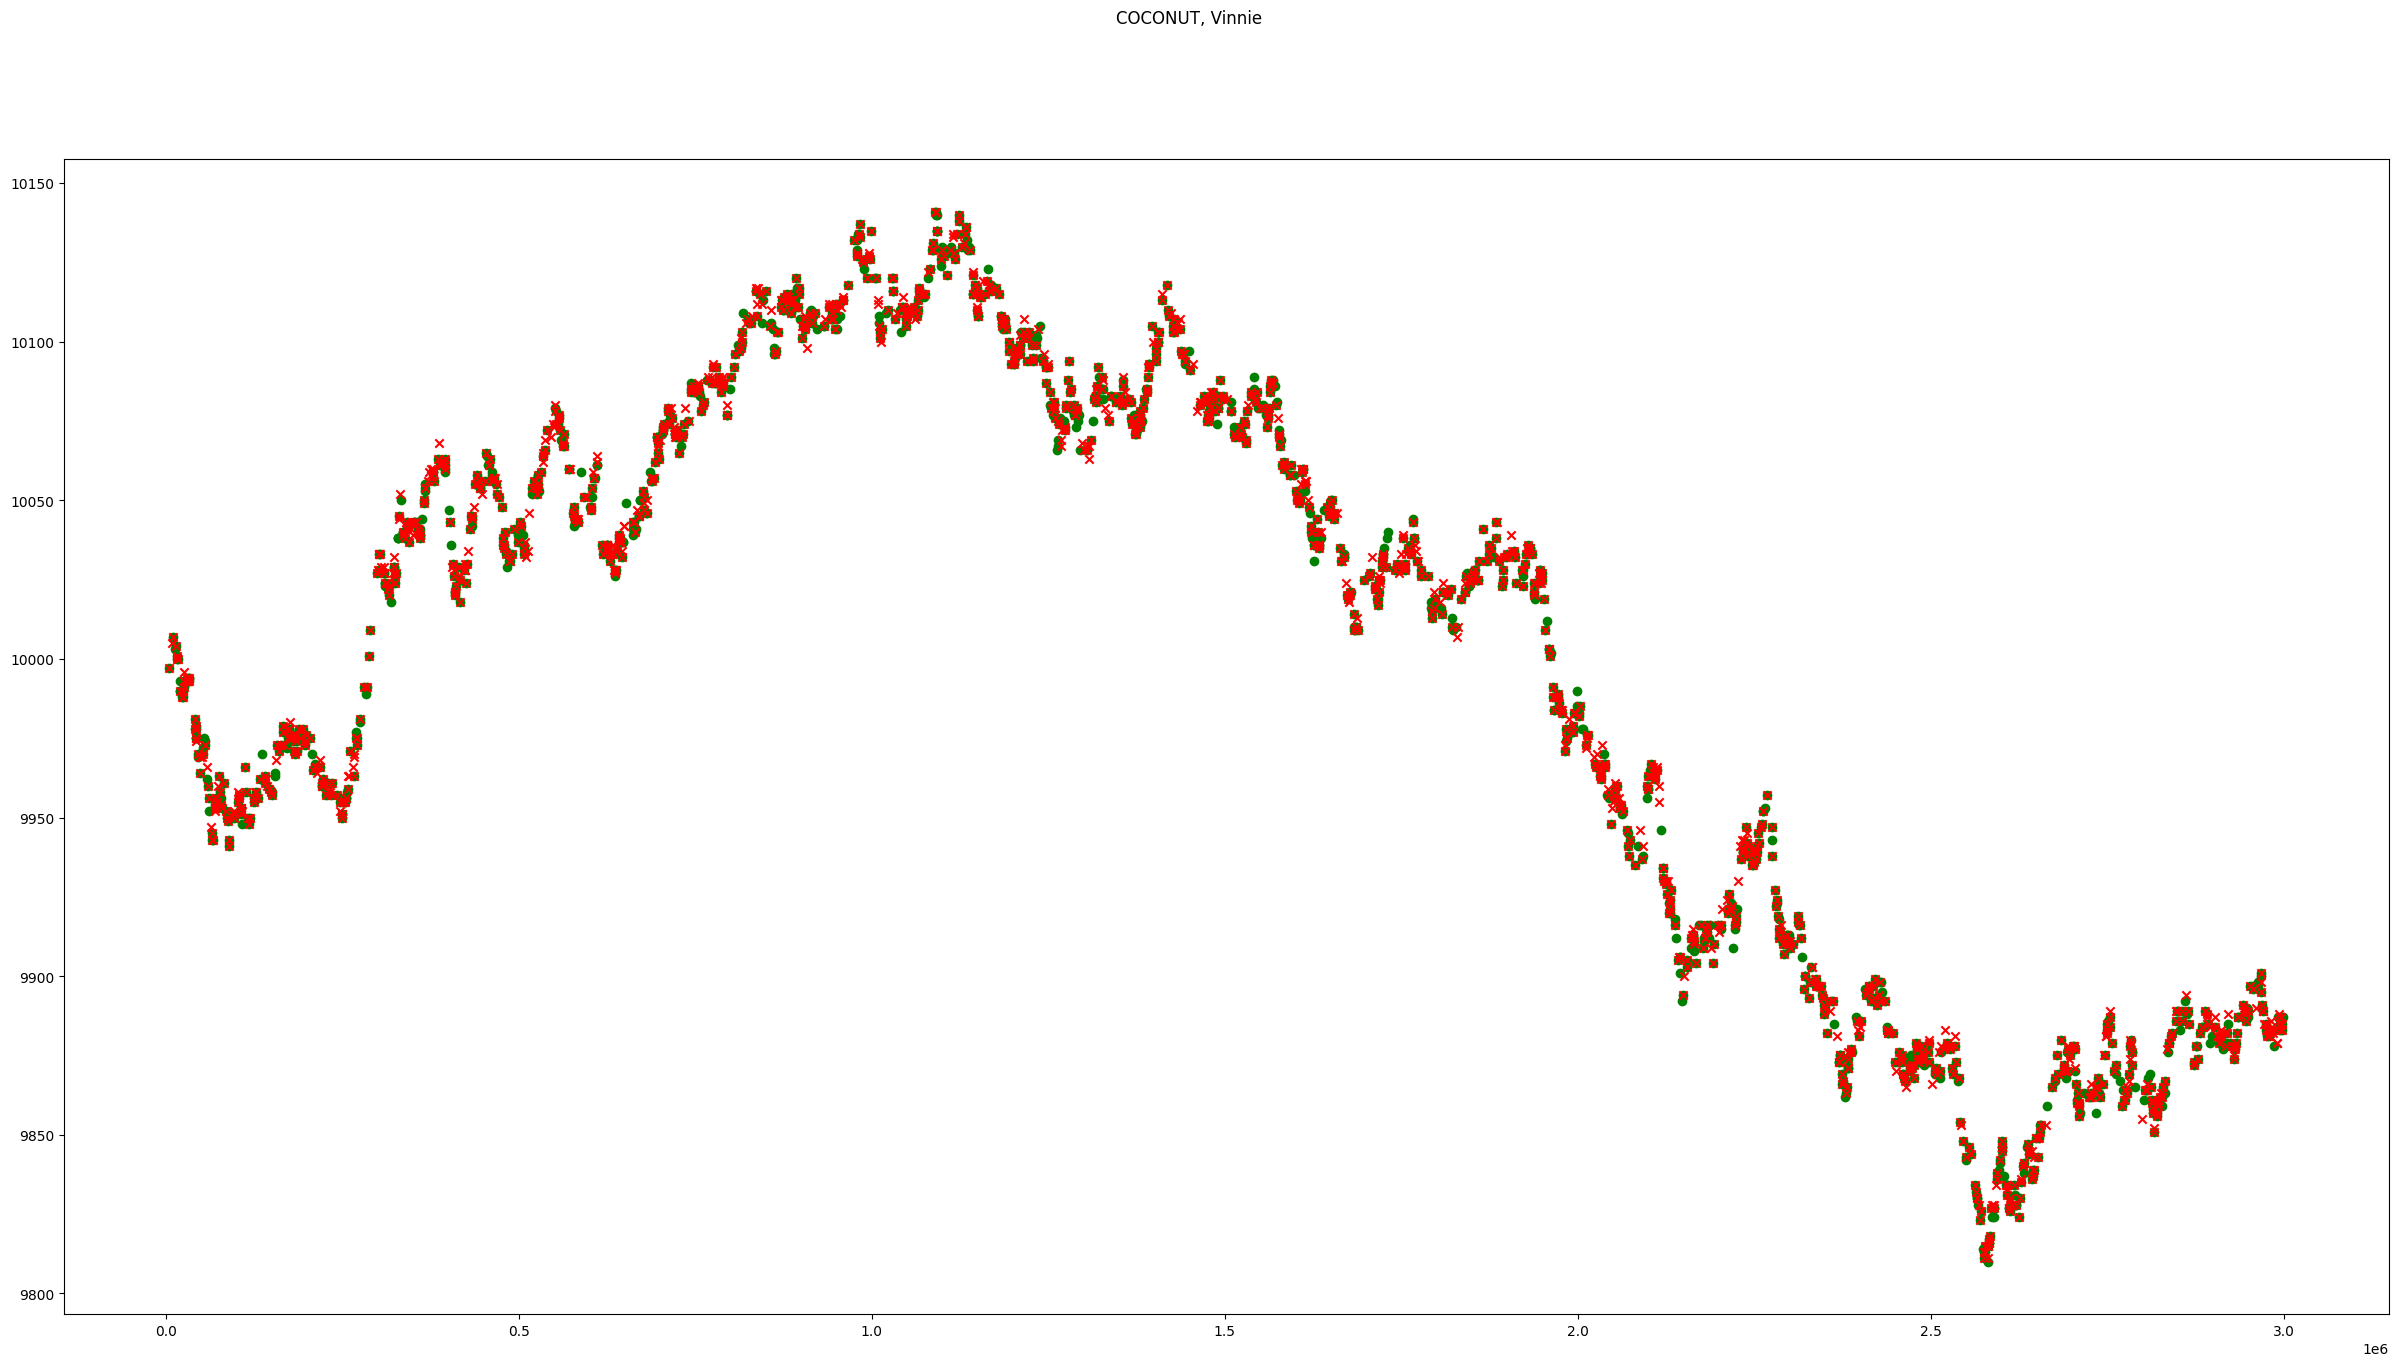

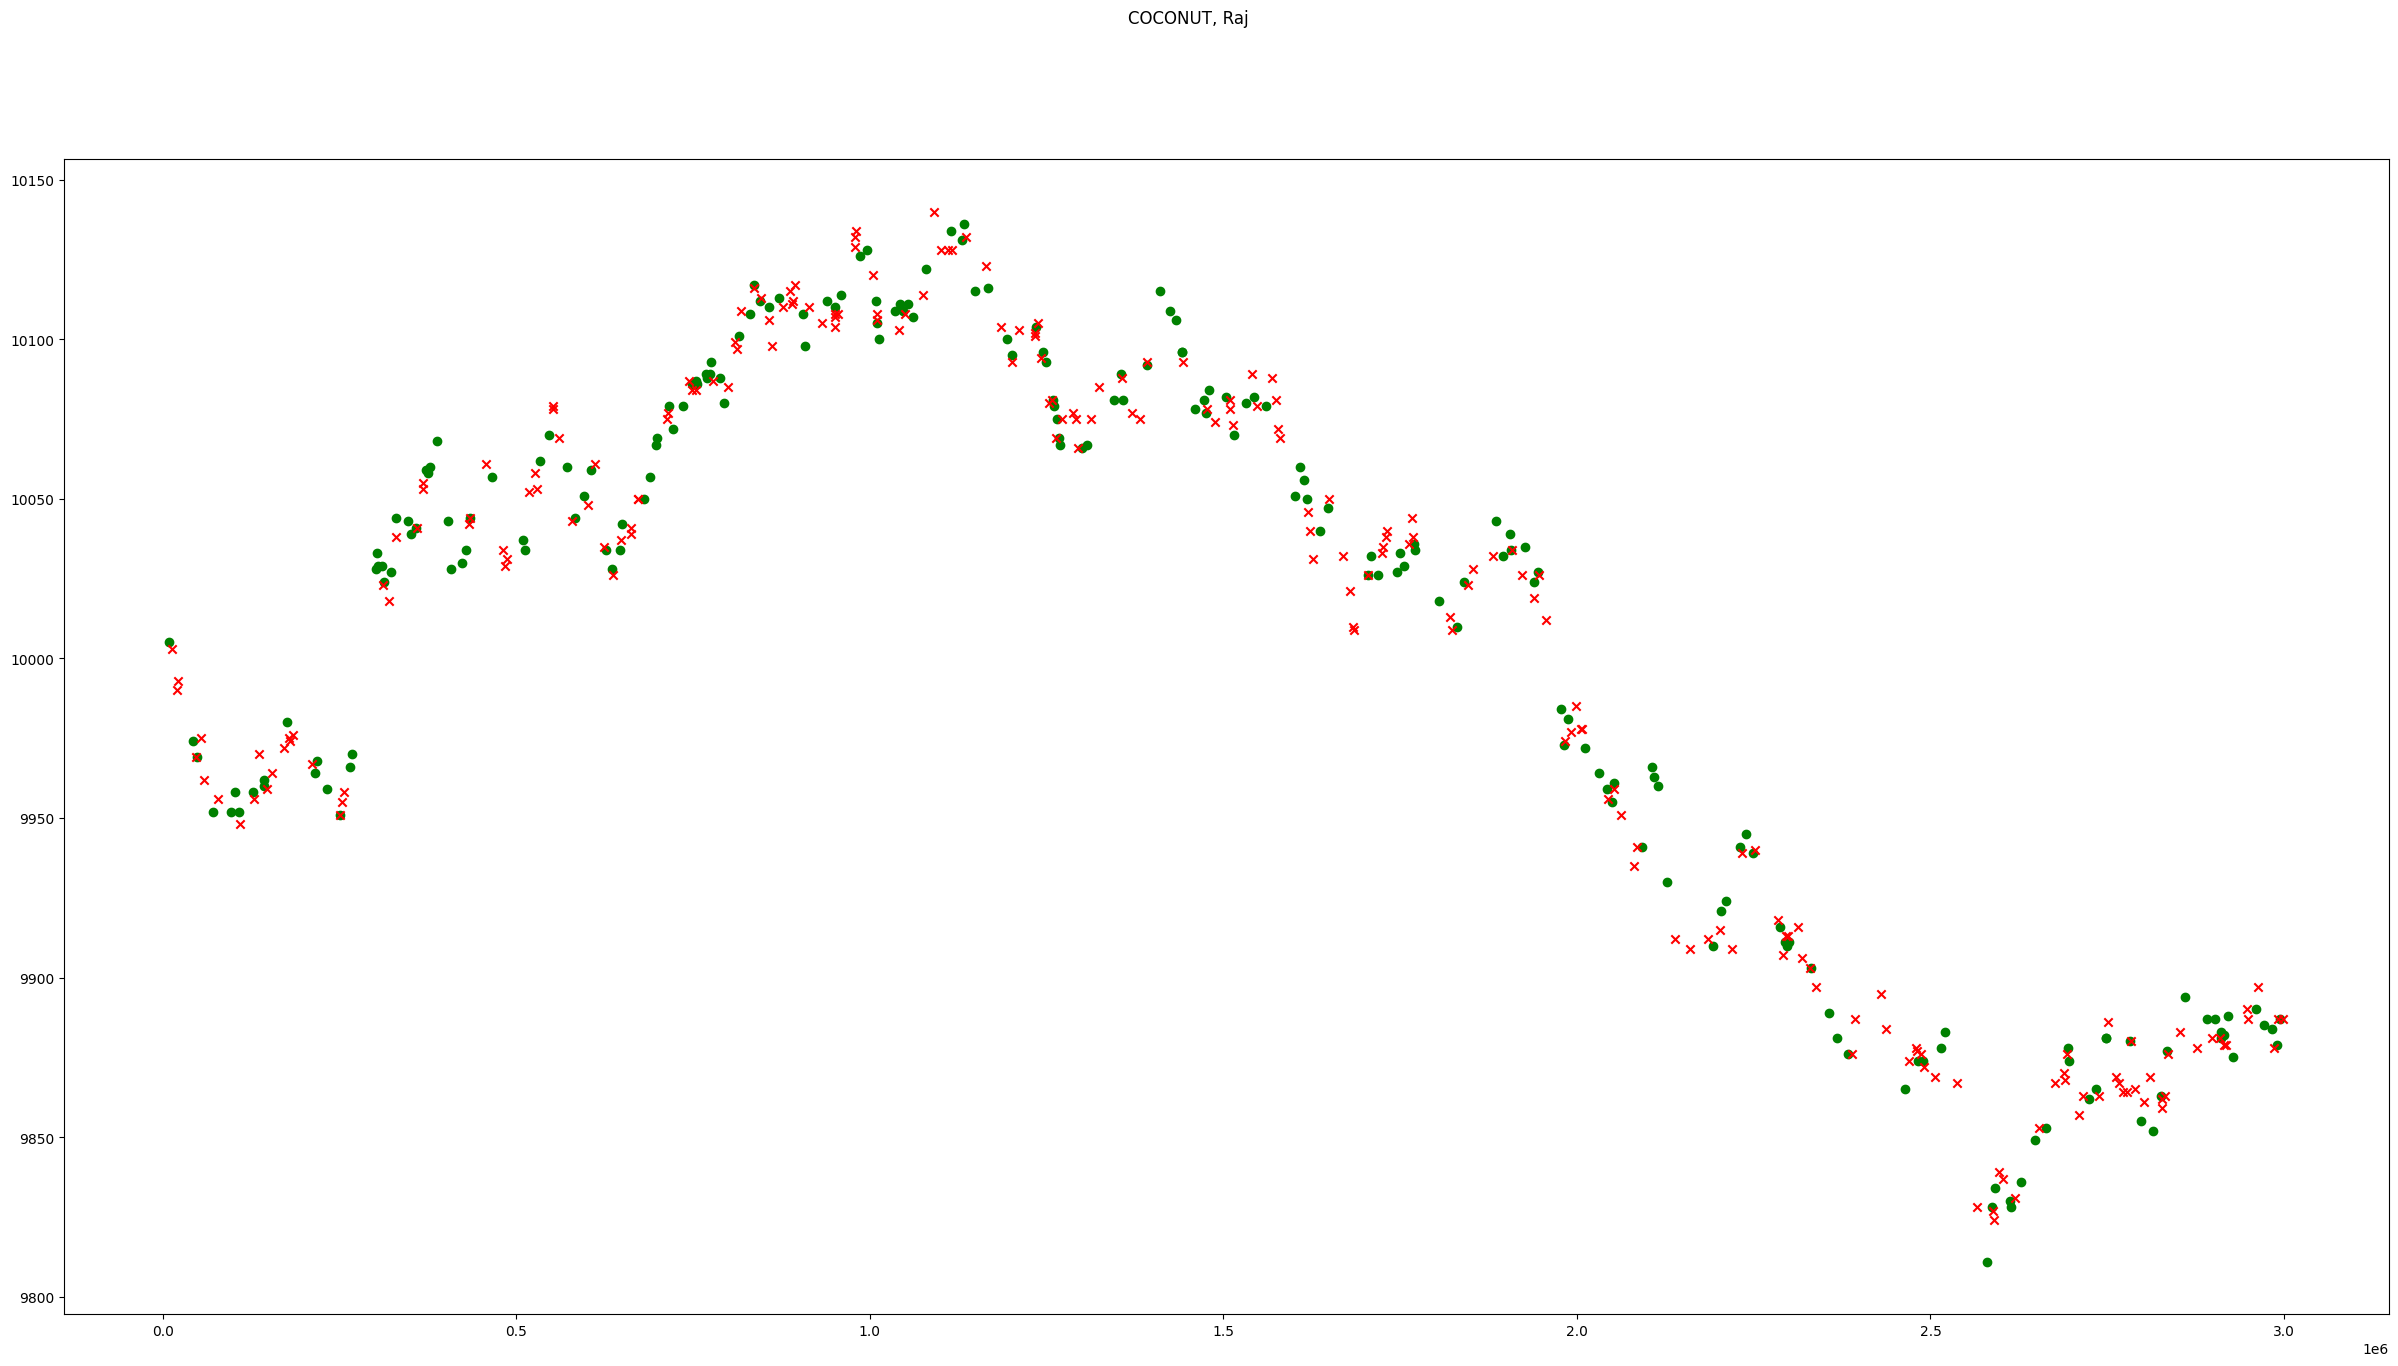

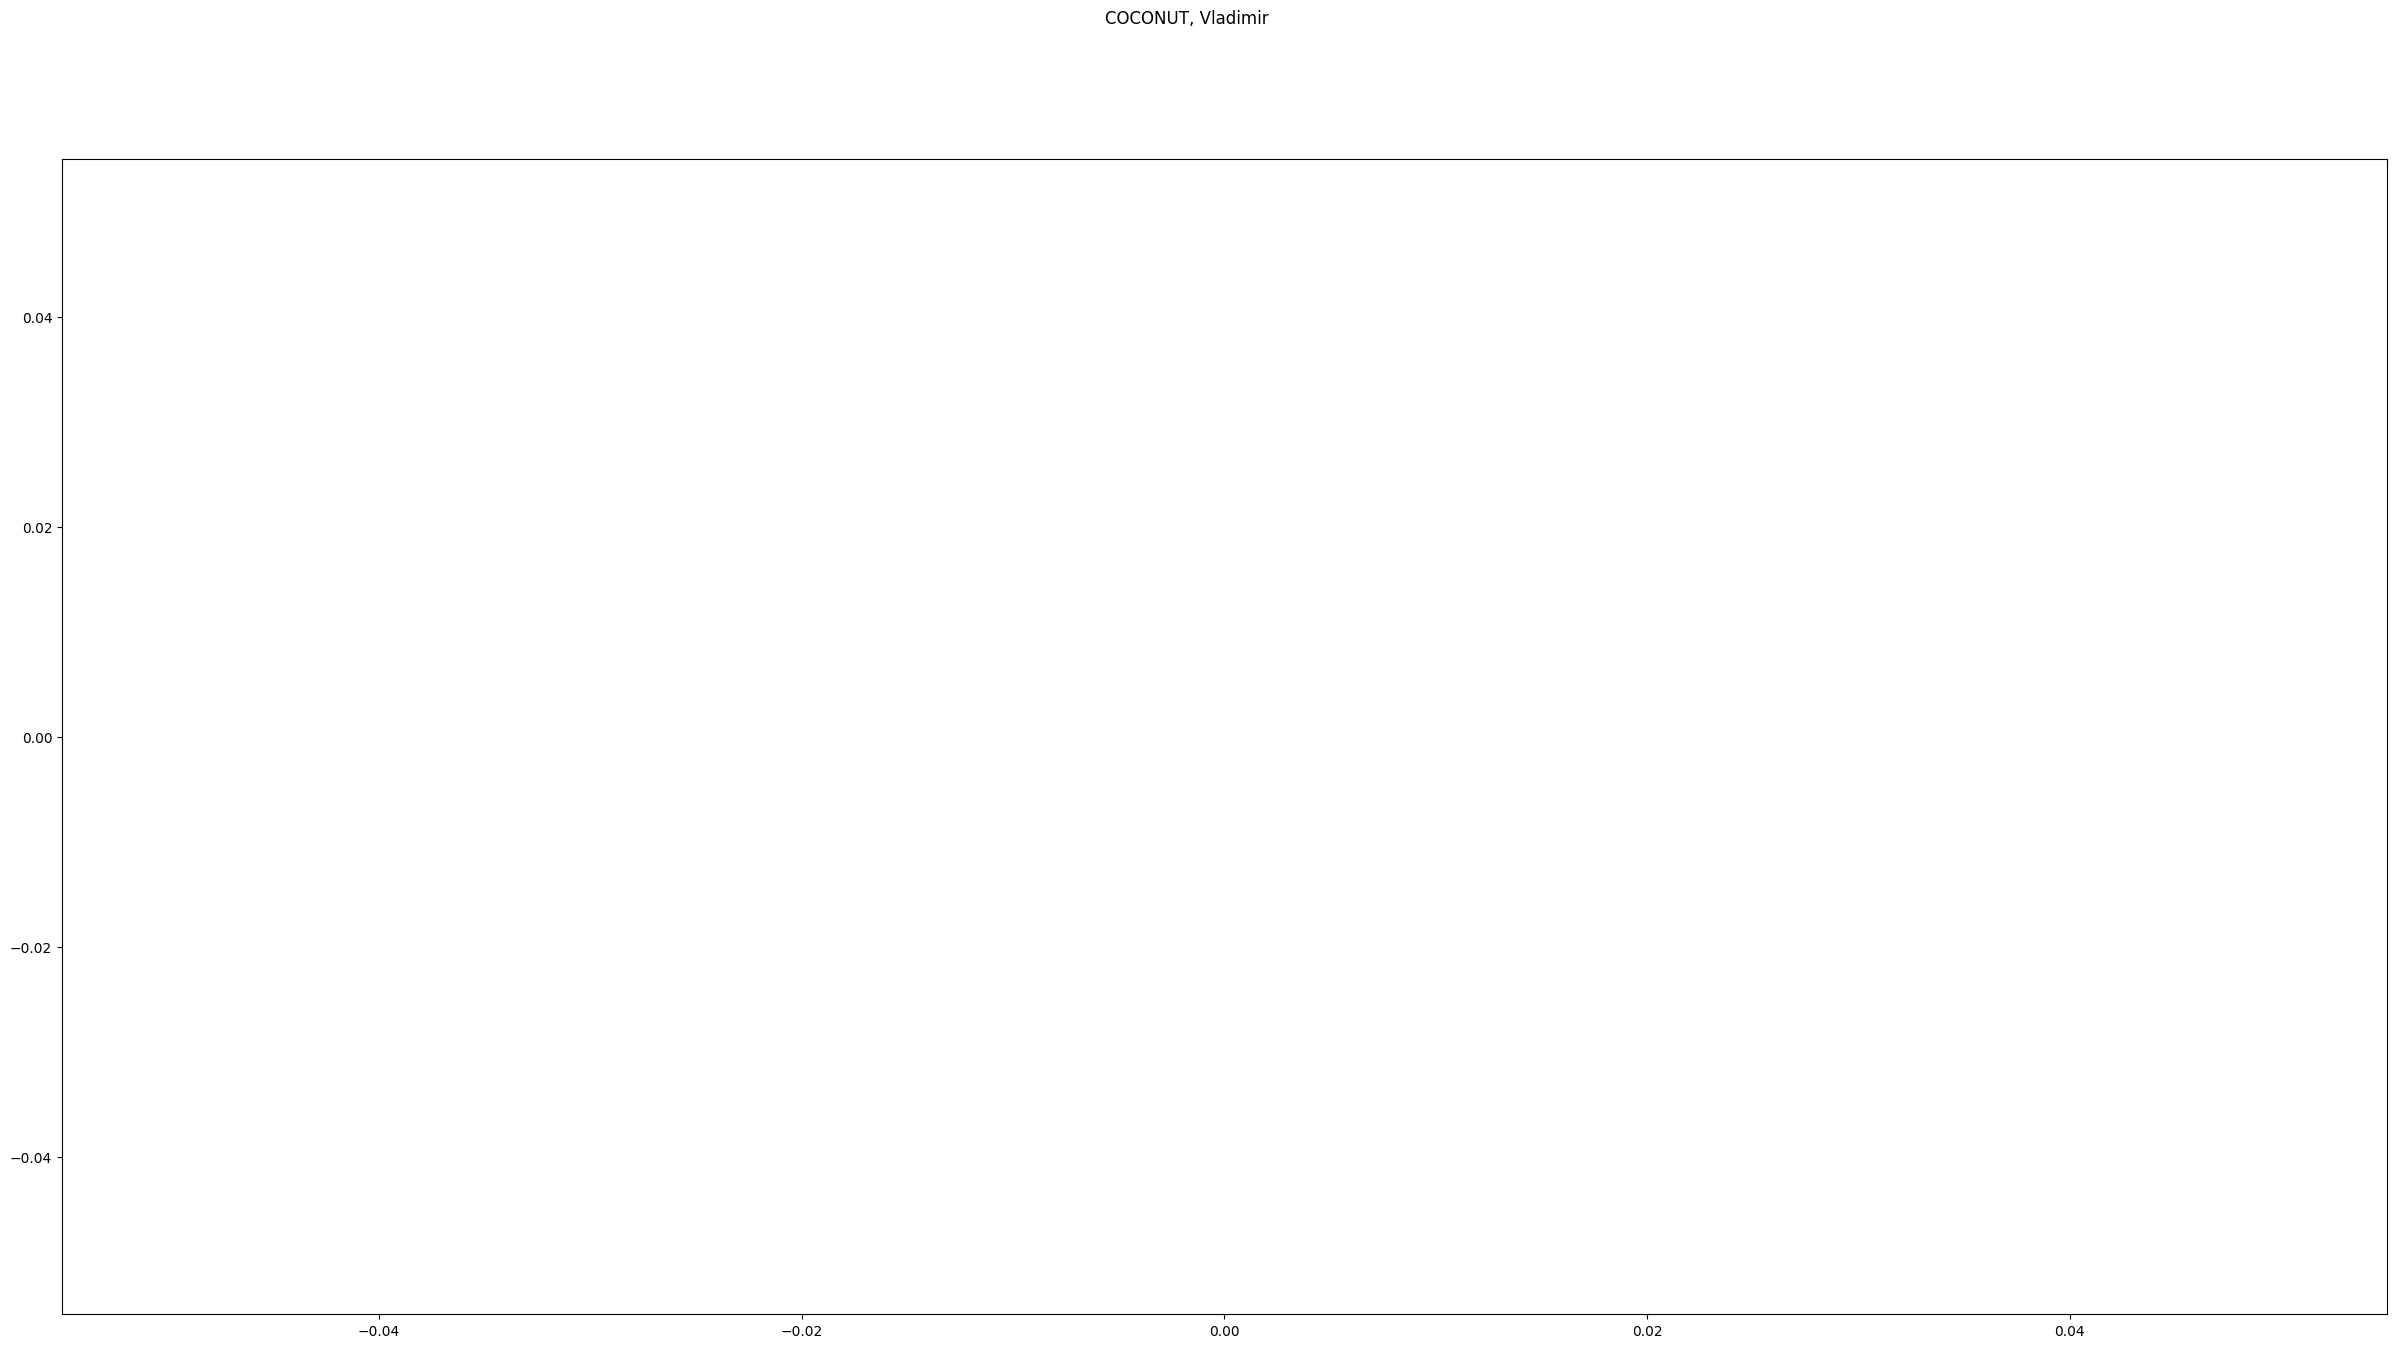

In [42]:
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

for product in products:
    for bot in bots:
        fig = plt.figure(figsize=(30,15))#px.line(prices[prices['product'] == product], x='timestamp', y=['ask_price_1', 'bid_price_1'])
        fig.suptitle(f'{product}, {bot}')

        buy_trades = trades[(trades['buyer'] == bot) & (trades['symbol'] == product)]
        sell_trades = trades[(trades['seller'] == bot) & (trades['symbol'] == product)]
        plt.scatter(buy_trades['timestamp'], buy_trades['price'], marker='o', color='g')
        plt.scatter(sell_trades['timestamp'], sell_trades['price'], marker='x', color='r')
        plt.show()

rhianna, roses -> buy:buy, sell: sell

chocolate, vladimir -> second buy: sell, third buy: close

roses,vladimir -> first buy: sell, second buy: close